# PROJECT :  telecommunications Churn


# Business Objective


Business Objective: Customer churn is a big problem for telecommunications companies. Indeed, their annual churn rates are usually higher than 10%. For that reason, they develop strategies to keep as many clients as possible. This is a classification project since the variable to be predicted is binary (churn or loyal customer). The goal here is to model churn probability, conditioned on the customer features

# Required Labraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
#Understing of Data

In [3]:
Data= pd.read_csv("telecommunications_churn (1).csv")
Data.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [4]:
Data['international_plan'].value_counts()#1-Churn, 0-No Churn

0    3010
1     323
Name: international_plan, dtype: int64

In [5]:
Data.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

In [6]:
Data.dtypes

account_length              int64
voice_mail_plan             int64
voice_mail_messages         int64
day_mins                  float64
evening_mins              float64
night_mins                float64
international_mins        float64
customer_service_calls      int64
international_plan          int64
day_calls                   int64
day_charge                float64
evening_calls               int64
evening_charge            float64
night_calls                 int64
night_charge              float64
international_calls         int64
international_charge      float64
total_charge              float64
churn                       int64
dtype: object

In [7]:
#Describe data
Data.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


# observation:
In dataset we see that in some column large diff between mean-50%-max value

In [8]:
#Describe data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [9]:
Data.nunique()

account_length             212
voice_mail_plan              2
voice_mail_messages         46
day_mins                  1667
evening_mins              1611
night_mins                1591
international_mins         162
customer_service_calls      10
international_plan           2
day_calls                  119
day_charge                1667
evening_calls              123
evening_charge            1440
night_calls                120
night_charge               933
international_calls         21
international_charge       162
total_charge              2227
churn                        2
dtype: int64

# observation:
  1)In dataset all columns contain numeric value ,No catogorical value are present.
  

# Null and duplicate value

In [10]:
#To check null value
Data.isnull().any()

account_length            False
voice_mail_plan           False
voice_mail_messages       False
day_mins                  False
evening_mins              False
night_mins                False
international_mins        False
customer_service_calls    False
international_plan        False
day_calls                 False
day_charge                False
evening_calls             False
evening_charge            False
night_calls               False
night_charge              False
international_calls       False
international_charge      False
total_charge              False
churn                     False
dtype: bool

In [11]:
#print the null row
Data[Data.isnull().any(axis=1)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn


observation:
No null value

In [12]:
#To check duplicate
Data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

In [13]:
#print the duplicated row
Data[Data.duplicated()]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn


# Observation:
NO missing value and No duplicate value is in present data

In [14]:
#Summery
df=pd.DataFrame(Data)
x=df.iloc[:,0:18]
y=df.iloc[:,18]
X=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  churn   R-squared (uncentered):                   0.288
Model:                            OLS   Adj. R-squared (uncentered):              0.285
Method:                 Least Squares   F-statistic:                              79.03
Date:                Sun, 08 Jan 2023   Prob (F-statistic):                   1.08e-229
Time:                        09:53:42   Log-Likelihood:                         -943.43
No. Observations:                3333   AIC:                                      1921.
Df Residuals:                    3316   BIC:                                      2025.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
account_length         -9.015e-05      0.000     -0.655      0.513      -0.000       0.000
voice_mail_plan           -0.1399      0.043     -3.251      0.001      -0.224      -0.056
voice_mail_messages        0.0019      0.001      1.371      0.170      -0.001       0.005
day_mins                   0.0618      0.331      0.187      0.852      -0.588       0.712
evening_mins               0.1025      0.165      0.623      0.533      -0.220       0.425
night_mins                -0.0382      0.088     -0.433      0.665      -0.211       0.135
international_mins        -0.3879      0.525     -0.739      0.460      -1.417       0.642
customer_service_calls     0.0542      0.004     12.872      0.000       0.046       0.062
international_plan         0.3030      0.019     16.011      0.000       0.266       0.340
day_calls                 -0.0005      0.000     -1.948      0.051      -0.001    3.15e-06
day_charge                -0.5055      1.690     -0.299      0.765      -3.818       2.807
evening_calls             -0.0007      0.000     -2.859      0.004      -0.001      -0.000
evening_charge            -1.3495      1.695     -0.796      0.426      -4.673       1.974
night_calls               -0.0008      0.000     -3.116      0.002      -0.001      -0.000
night_charge               0.7015      1.696      0.414      0.679      -2.624       4.027
international_calls       -0.0103      0.002     -4.592      0.000      -0.015      -0.006
international_charge       1.3017      1.689      0.771      0.441      -2.010       4.614
total_charge               0.1482      0.786      0.189      0.850      -1.393       1.690
==============================================================================
Omnibus:                      868.491   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1765.932
Skew:                           1.565   Prob(JB):                         0.00
Kurtosis:                       4.707   Cond. No.                     5.86e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.56e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
Data.corr()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
account_length,1.000000,0.002918,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.024735,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,0.001454,0.016541
voice_mail_plan,0.002918,1.000000,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,0.006006,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,0.008585,-0.102148
voice_mail_messages,-0.004628,0.956927,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,0.008745,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,0.009766,-0.089728
day_mins,0.006216,-0.001684,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.049396,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,0.884754,0.205151
evening_mins,-0.006757,0.021545,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.019100,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.413143,0.092796
night_mins,-0.008955,0.006079,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,-0.028905,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,0.214257,0.035493
international_mins,0.009514,-0.001318,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.045871,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,0.054988,0.068239
customer_service_calls,-0.003796,-0.017824,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.024522,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,-0.019873,0.208750
international_plan,0.024735,0.006006,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,1.000000,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780,0.048415,0.259852
day_calls,0.038470,-0.011086,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,0.003755,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,0.003673,0.018459


<AxesSubplot: >

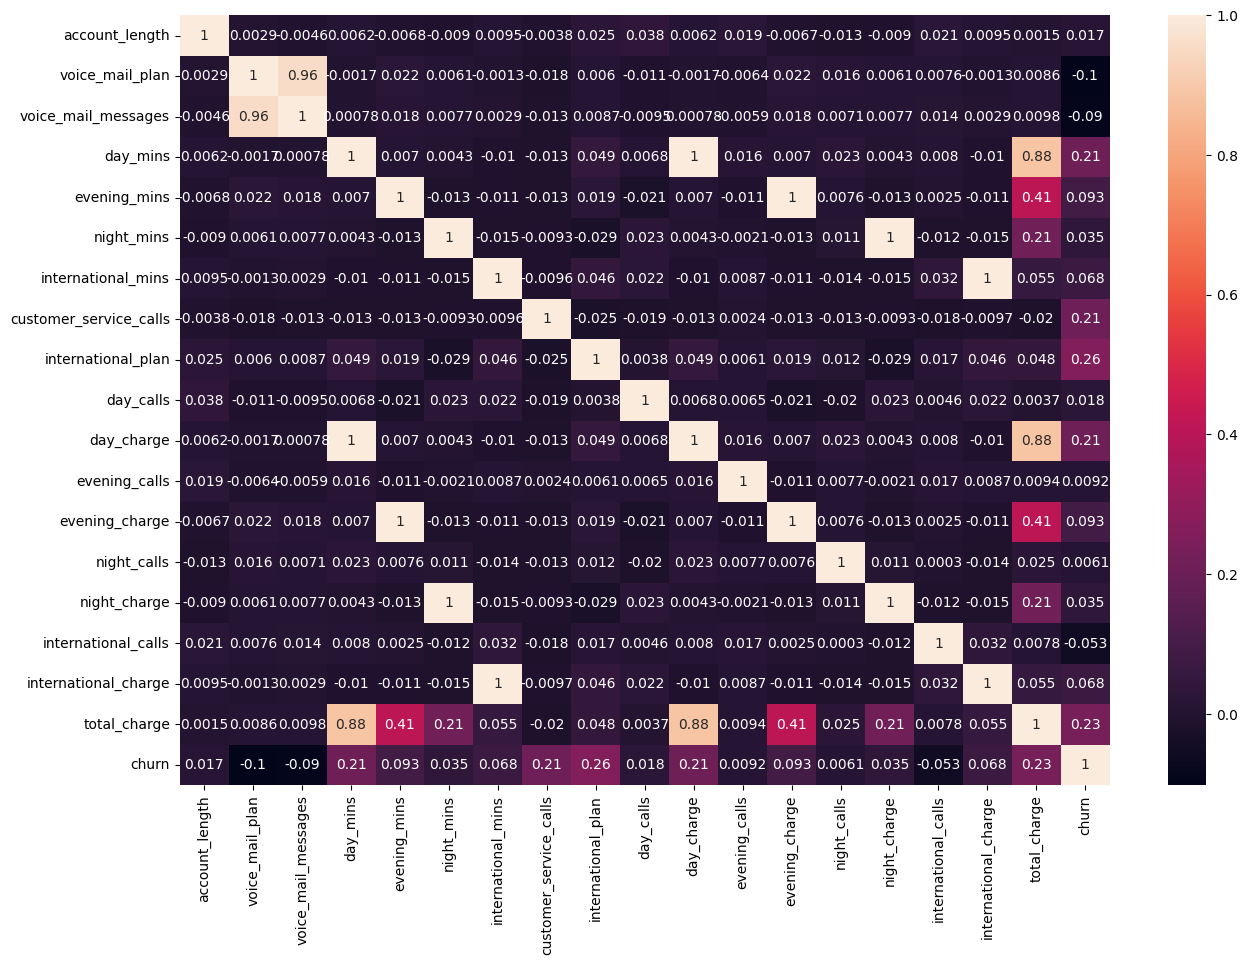

In [16]:

plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(Data.corr(),annot=True)

# observation

1)In a data voice_mail_plan and voice_mail_messages contain strong correlation ie 1

2)In a data night_charge and night_mins contain strong correlation ie 1

3)In a data international_mins and international_charge contain strong correlation ie 1

4)In a data day_charge and total_charge and day_mins contain strong correlation ie 0.88

5)In a data evening_charge and evening_mins contain strong correlation ie 1


In [17]:
Data['churn'].value_counts()#1-Churn, 0-No Churn

0    2850
1     483
Name: churn, dtype: int64

In [18]:
df1=Data['churn'].value_counts().index
df2=Data['churn'].value_counts().values

In [19]:
df2=Data['churn'].value_counts().values

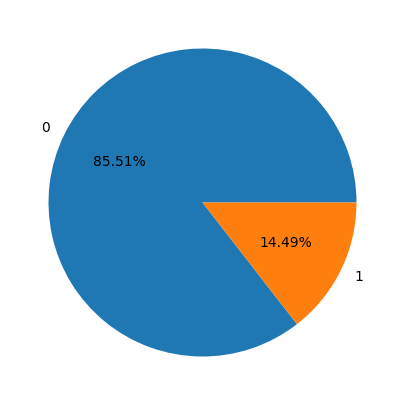

In [20]:
plt.rcParams['figure.figsize']=(11,5)
pieplot=plt.pie(df2,labels=df1,autopct='%1.2f%%')

 observation:     distrubution of data of 85.51% is not churn and 14.49% is churn

In [21]:
Data['churn'].value_counts()*100/len(Data['churn'])

0    85.508551
1    14.491449
Name: churn, dtype: float64

In [22]:
def zscore_capping(Data,col_name,thr):
    mean=Data[col_name].mean()
    std= Data[col_name].std()
    
    upper_bound=mean + thr*std
    lower_bound=mean - thr*std
    
    Data[col_name]=np.where(Data[col_name]>upper_bound,upper_bound,np.where(Data[col_name] < lower_bound, lower_bound,Data[col_name]))
                                        

# Account length

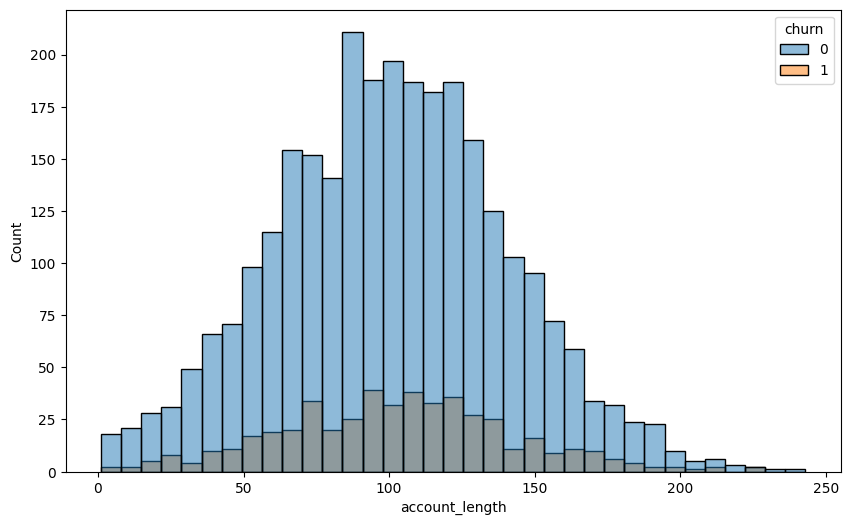

In [23]:
plt.rcParams['figure.figsize']=(10,6)
hist=sns.histplot(x=Data['account_length'], hue = Data['churn'],stat='count')

In Account length Higer churn of customer is in between 50 to 155

In [24]:
#Z Score
Data['zscore']=(Data.account_length-Data.account_length.mean())/Data.account_length.std()
#outlier in dataset
Data[(Data.zscore<-3)|(Data.zscore>3)]


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
416,224,0,0,171.5,160.0,212.4,5.0,1,1,99,29.16,103,13.60,102,9.56,2,1.35,53.67,1,3.087109
817,243,0,0,95.5,163.7,264.2,6.6,2,0,92,16.24,63,13.91,118,11.89,6,1.78,43.82,0,3.564231
1408,232,0,0,165.6,195.9,118.3,11.8,1,0,104,28.15,115,16.65,77,5.32,3,3.19,53.31,0,3.288003
1551,225,0,0,165.4,273.7,210.0,8.7,0,0,106,28.12,109,23.26,93,9.45,3,2.35,63.18,1,3.112221
1751,225,0,0,182.7,246.5,218.0,8.8,1,0,142,31.06,63,20.95,103,9.81,2,2.38,64.20,0,3.112221
1886,224,0,0,111.4,175.0,217.2,5.5,3,0,133,18.94,66,14.88,106,9.77,6,1.49,45.08,0,3.087109
3216,221,1,24,180.5,224.1,205.7,2.4,0,0,85,30.69,92,19.05,103,9.26,3,0.65,59.65,0,3.011774


In [25]:
 data=zscore_capping(Data,'account_length', 3)

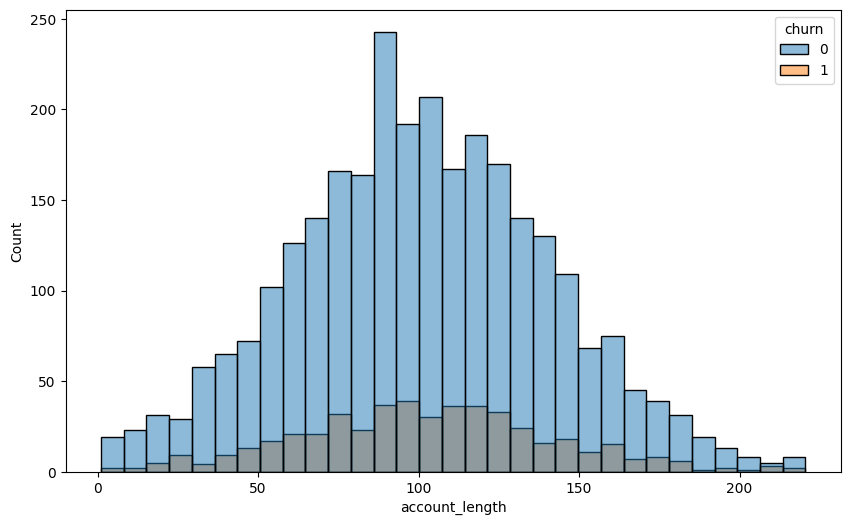

In [26]:
plt.rcParams['figure.figsize']=(10,6)
hist=sns.histplot(x=Data['account_length'], hue = Data['churn'],stat='count')

In [27]:
Data.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3.333000e+03
mean,101.049720,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914,1.449652e-16
std,39.774162,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067,1.000000e+00
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000,-2.512795e+00
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000,-6.796428e-01
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000,-1.627400e-03
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000,6.512763e-01
max,220.531124,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000,3.564231e+00


# voice_mail_plan

<AxesSubplot: xlabel='voice_mail_plan', ylabel='Count'>

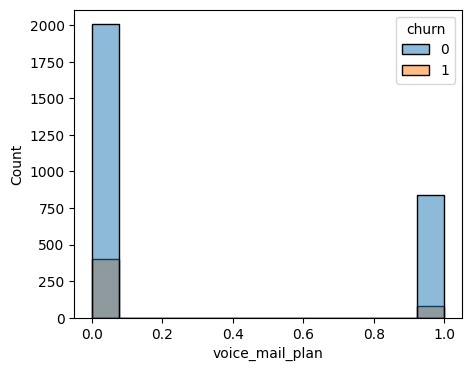

In [28]:
plt.rcParams['figure.figsize']=(5,4)
sns.histplot(x=Data['voice_mail_plan'], hue = Data['churn'])

In voice_mail_plan Higer churn 

In [29]:
#Z Score
Data['zscore']=(Data.voice_mail_plan-Data.voice_mail_plan.mean())/Data.voice_mail_plan.std()
#outlier in dataset
Data[(Data['zscore']<-3)|(Data['zscore']>3)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore


In [30]:
#No outlier

In [31]:
 zscore_capping(Data,'voice_mail_plan', 3)

<AxesSubplot: xlabel='voice_mail_plan', ylabel='Count'>

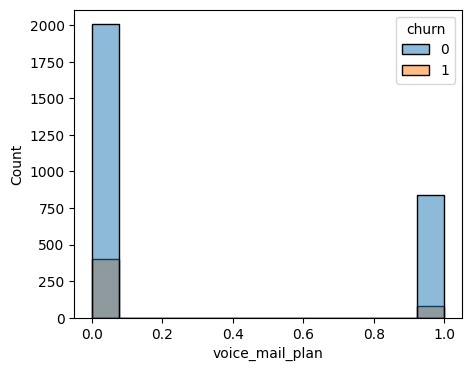

In [32]:
plt.rcParams['figure.figsize']=(5,4)
sns.histplot(x=Data['voice_mail_plan'], hue = Data['churn'])

# night_mins

<AxesSubplot: xlabel='night_mins', ylabel='Count'>

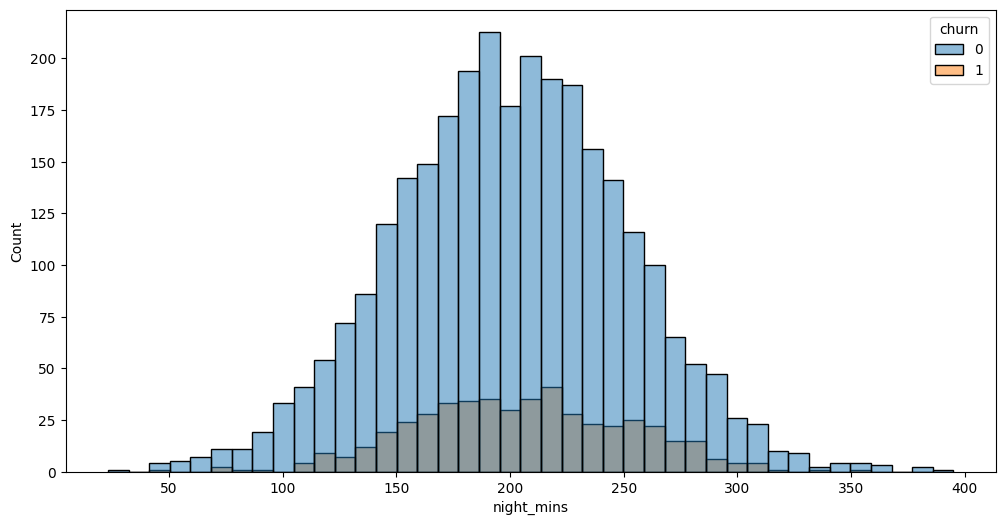

In [33]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['night_mins'], hue = Data['churn'])

In night_mins Higer churn of customer is in between 145 to 255

In [34]:
#Z Score
Data['zscore']=(Data.night_mins-Data.night_mins.mean())/Data.night_mins.std()
#Outlier
Data[(Data['zscore']<-3)|(Data['zscore']>3)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
244,108.0,0.0,0,198.5,267.8,354.9,9.4,0,0,99,33.75,60,22.76,75,15.97,3,2.54,75.02,1,3.045605
883,42.0,0.0,0,146.3,255.9,45.0,8.0,1,0,84,24.87,113,21.75,117,2.03,12,2.16,50.81,0,-3.082068
922,80.0,0.0,0,239.9,142.3,364.3,9.3,1,0,121,40.78,51,12.10,106,16.39,5,2.51,71.78,0,3.231472
1113,152.0,0.0,0,206.3,292.8,43.7,10.6,1,0,98,35.07,82,24.89,121,1.97,4,2.86,64.79,0,-3.107773
1260,76.0,1.0,22,160.1,168.7,23.2,9.5,3,0,107,27.22,136,14.34,102,1.04,4,2.57,45.17,0,-3.513121
1317,89.0,1.0,29,163.5,274.8,381.9,7.5,2,0,80,27.80,136,23.36,147,17.19,5,2.03,70.38,0,3.579478
1445,55.0,1.0,8,222.5,171.5,377.5,9.7,1,0,104,37.83,94,14.58,114,16.99,2,2.62,72.02,0,3.492476
2321,153.0,0.0,0,154.6,263.0,367.7,15.5,1,0,56,26.28,84,22.36,89,16.55,2,4.19,69.38,0,3.298700
2663,172.0,0.0,0,169.8,183.1,395.0,12.7,2,0,123,28.87,94,15.56,72,17.77,7,3.43,65.63,0,3.838505
3107,73.0,0.0,0,157.6,198.3,364.9,9.1,1,0,92,26.79,87,16.86,106,16.42,4,2.46,62.53,0,3.243336


In [35]:
 zscore_capping(Data,'night_mins', 3)

<AxesSubplot: xlabel='night_mins', ylabel='Count'>

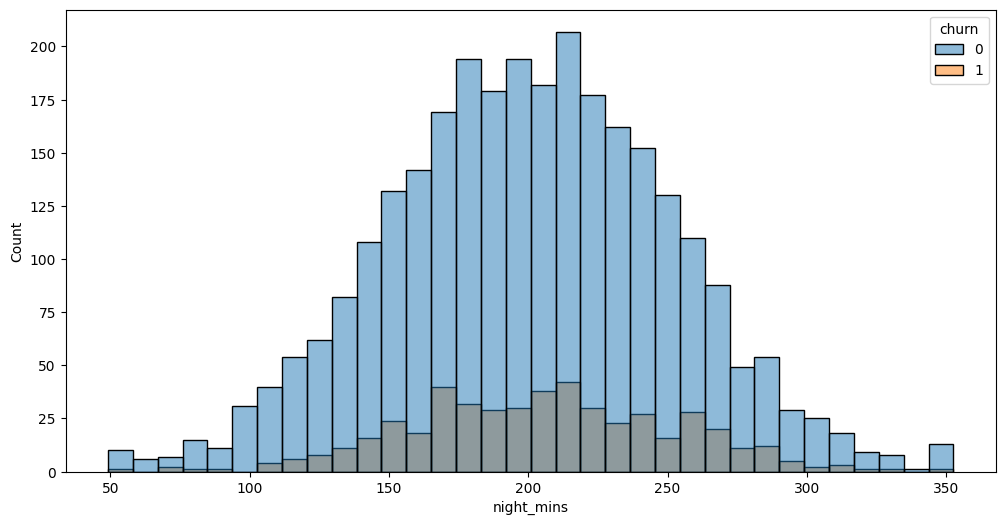

In [36]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['night_mins'], hue = Data['churn'])

# customer_service_calls

<AxesSubplot: xlabel='customer_service_calls', ylabel='Count'>

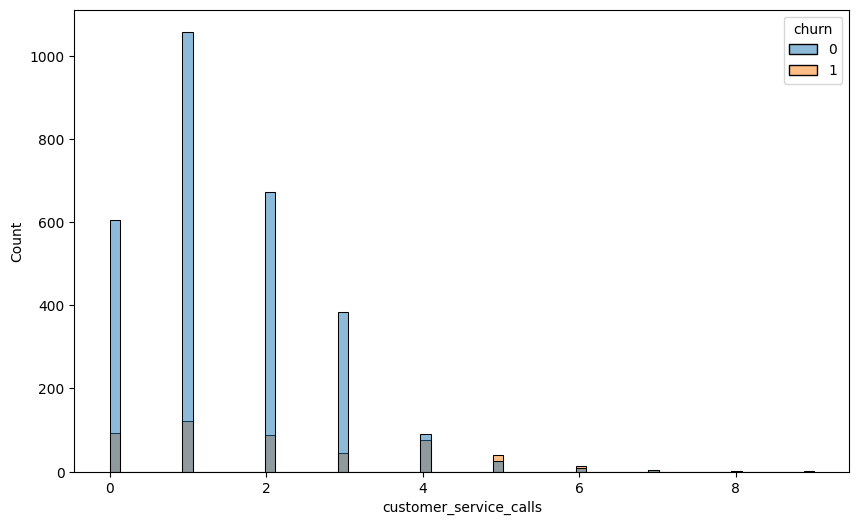

In [37]:
plt.rcParams['figure.figsize']=(10,6)
sns.histplot(x=Data['customer_service_calls'], hue = Data['churn'])

In customer_service_calls not that much higer churn of customer

In [38]:
#Z Score
Data['zscore']=(Data.customer_service_calls-Data.customer_service_calls.mean())/Data.customer_service_calls.std()
#Outlier
Data[(Data['zscore']<-3)|(Data['zscore']>3)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
332,86.0,0.0,0,128.3,197.1,138.4,12.2,7,0,121,21.81,93,16.75,152,6.23,5,3.29,48.08,1,4.133167
522,122.0,1.0,27,253.7,229.2,190.5,9.2,7,0,84,43.13,109,19.48,123,8.57,5,2.48,73.66,0,4.133167
542,152.0,1.0,20,237.5,253.4,265.2,14.2,9,1,120,40.38,94,21.54,80,11.93,3,3.83,77.68,1,5.653511
694,165.0,0.0,0,154.2,268.6,188.8,10.9,6,0,91,26.21,108,22.83,99,8.50,4,2.94,60.48,0,3.372994
721,103.0,1.0,36,87.2,169.3,166.7,10.9,6,0,92,14.82,110,14.39,80,7.50,5,2.94,39.65,1,3.372994
778,115.0,1.0,26,170.5,217.2,225.7,13.6,6,0,107,28.99,77,18.46,71,10.16,5,3.67,61.28,0,3.372994
902,149.0,0.0,0,166.6,218.8,208.3,8.2,7,0,61,28.32,107,18.60,131,9.37,6,2.21,58.50,0,4.133167
908,23.0,0.0,0,190.2,166.4,219.8,15.0,6,0,89,32.33,108,14.14,73,9.89,4,4.05,60.41,0,3.372994
974,21.0,1.0,31,135.9,271.0,179.1,9.5,6,0,90,23.10,84,23.04,89,8.06,7,2.57,56.77,0,3.372994
1142,105.0,0.0,0,106.4,240.1,147.7,5.3,6,0,71,18.09,83,20.41,114,6.65,4,1.43,46.58,1,3.372994


In [39]:
 zscore_capping(Data,'customer_service_calls', 3)

<AxesSubplot: xlabel='customer_service_calls', ylabel='Count'>

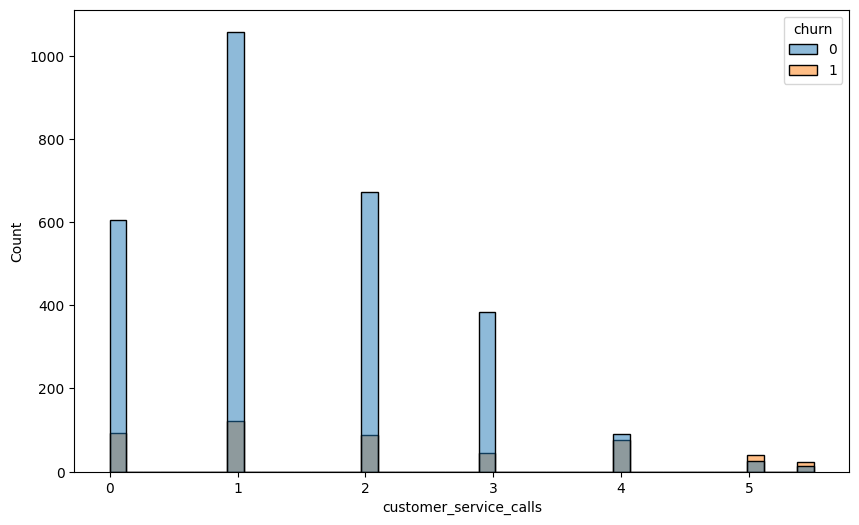

In [40]:
plt.rcParams['figure.figsize']=(10,6)
sns.histplot(x=Data['customer_service_calls'], hue = Data['churn'])

# international_plan

<AxesSubplot: xlabel='international_plan', ylabel='Count'>

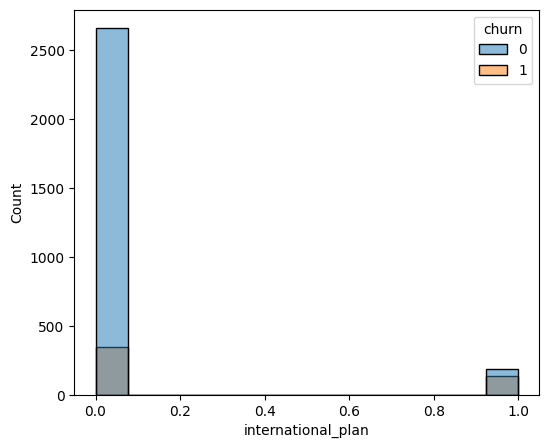

In [41]:
plt.rcParams['figure.figsize']=(6,5)
sns.histplot(x=Data['international_plan'], hue = Data['churn'])

In [42]:
#Z Score
Data['zscore']=(Data.international_plan-Data.international_plan.mean())/Data.international_plan.std()
#Outlier
Data[(Data['zscore']<-3)|(Data['zscore']>3)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
3,84.0,0.0,0,299.4,61.9,196.9,6.6,2.0,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0,3.052227
4,75.0,0.0,0,166.7,148.3,186.9,10.1,3.0,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0,3.052227
5,118.0,0.0,0,223.4,220.6,203.9,6.3,0.0,1,98,37.98,101,18.75,118,9.18,6,1.70,67.61,0,3.052227
7,147.0,0.0,0,157.0,103.1,211.8,7.1,0.0,1,79,26.69,94,8.76,96,9.53,6,1.92,46.90,0,3.052227
9,141.0,1.0,37,258.6,222.0,326.4,11.2,0.0,1,84,43.96,111,18.87,97,14.69,5,3.02,80.54,0,3.052227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3304,71.0,0.0,0,186.1,198.6,206.5,13.8,4.0,1,114,31.64,140,16.88,80,9.29,5,3.73,61.54,1,3.052227
3309,100.0,0.0,0,219.4,225.7,255.3,12.0,4.0,1,112,37.30,102,19.18,95,11.49,4,3.24,71.21,0,3.052227
3317,163.0,0.0,0,197.2,188.5,211.1,7.8,1.0,1,90,33.52,113,16.02,94,9.50,8,2.11,61.15,0,3.052227
3320,122.0,0.0,0,140.0,196.4,120.1,9.7,4.0,1,101,23.80,77,16.69,133,5.40,4,2.62,48.51,1,3.052227


In [43]:
 zscore_capping(Data,'international_plan', 3)

<AxesSubplot: xlabel='international_plan', ylabel='Count'>

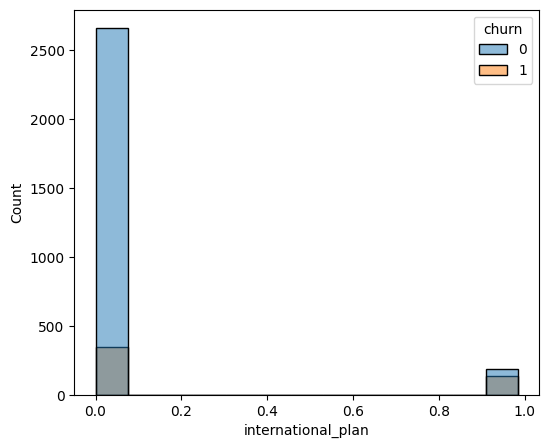

In [44]:
plt.rcParams['figure.figsize']=(6,5)
sns.histplot(x=Data['international_plan'], hue = Data['churn'])

# day_calls

<AxesSubplot: xlabel='day_calls', ylabel='Count'>

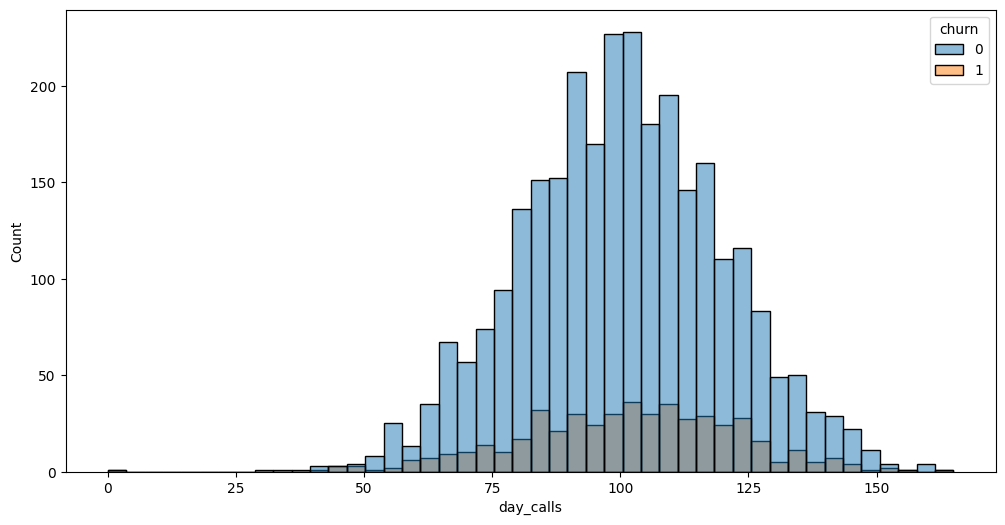

In [45]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['day_calls'], hue = Data['churn'])

In day_calls Higer churn of customer is in between 80 to 125 and graph is -ve skew

In [46]:
#Z Score
Data['zscore']=(Data.day_calls-Data.day_calls.mean())/Data.day_calls.std()
#Outlier
Data[(Data['zscore']<-3)|(Data['zscore']>3)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
468,86.0,1.0,32,70.9,166.7,244.9,11.1,3.0,0.0,163,12.05,121,14.17,105,11.02,5,3.00,40.24,0,3.117449
692,82.0,0.0,0,185.8,276.5,192.1,5.7,4.0,0.0,36,31.59,134,23.50,104,8.64,7,1.54,65.27,0,-3.210692
740,67.0,1.0,20,230.6,189.1,162.2,9.4,1.0,0.0,40,39.20,58,16.07,115,7.30,2,2.54,65.11,0,-3.011380
1121,91.0,0.0,0,154.4,168.3,239.9,11.7,5.0,0.0,165,26.25,121,14.31,81,10.80,4,3.16,54.52,1,3.217105
1144,155.0,0.0,0,216.7,144.3,135.3,10.8,2.0,0.0,30,36.84,125,12.27,106,6.09,1,2.92,58.12,0,-3.509659
1345,98.0,0.0,0,0.0,159.6,167.1,6.8,4.0,0.0,0,0.00,130,13.57,88,7.52,1,1.84,22.93,1,-5.004496
1397,101.0,0.0,0,0.0,192.1,168.8,7.2,1.0,0.0,0,0.00,119,16.33,95,7.60,4,1.94,25.87,0,-5.004496
1989,124.0,1.0,30,144.5,262.3,226.5,12.0,2.0,0.0,35,24.57,101,22.30,82,10.19,7,3.24,60.30,0,-3.260520
3187,58.0,1.0,39,211.9,274.4,210.5,5.4,1.0,0.0,40,36.02,76,23.32,139,9.47,4,1.46,70.27,0,-3.011380


In [47]:
 zscore_capping(Data,'day_calls', 3)

<AxesSubplot: xlabel='day_calls', ylabel='Count'>

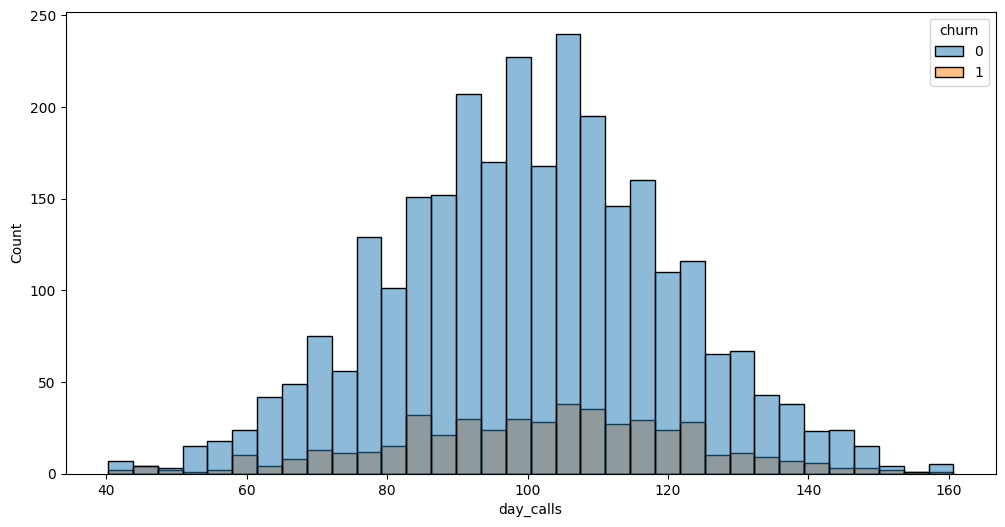

In [48]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['day_calls'], hue = Data['churn'])

# day_charge

<AxesSubplot: xlabel='day_charge', ylabel='Count'>

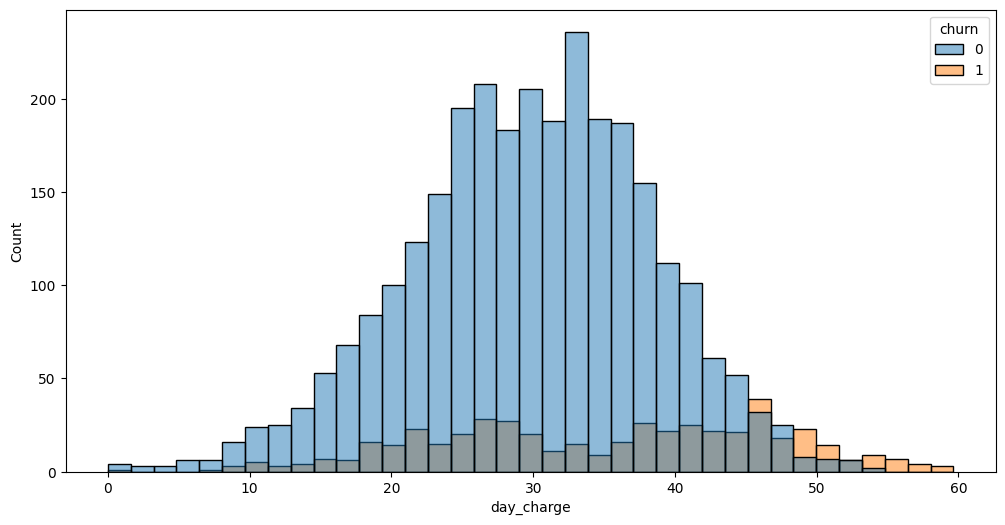

In [49]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['day_charge'], hue = Data['churn'])

In day_charge Higer churn of customer is in between 22 to 55

In [50]:
#Z Score
Data['zscore']=(Data.day_charge-Data.day_charge.mean())/Data.day_charge.std()
#Outlier
Data[(Data['zscore']<-3)|(Data['zscore']>3)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
365,154.0,0.0,0,350.8,216.5,253.9,10.1,1.0,0.000000,75.000000,59.64,94,18.40,100,11.43,9,2.73,92.20,1,3.140331
985,64.0,0.0,0,346.8,249.5,275.4,13.3,1.0,0.984547,55.000000,58.96,79,21.21,102,12.39,9,3.59,96.15,1,3.066893
1052,98.0,0.0,0,12.5,256.6,169.4,7.7,1.0,0.984547,67.000000,2.13,90,21.81,88,7.62,9,2.08,33.64,0,-3.070631
1345,98.0,0.0,0,0.0,159.6,167.1,6.8,4.0,0.000000,40.228391,0.00,130,13.57,88,7.52,1,1.84,22.93,1,-3.300667
1397,101.0,0.0,0,0.0,192.1,168.8,7.2,1.0,0.000000,40.228391,0.00,119,16.33,95,7.60,4,1.94,25.87,0,-3.300667
1986,70.0,0.0,0,7.9,136.4,156.6,12.1,0.0,0.000000,100.000000,1.34,83,11.59,89,7.05,1,3.27,23.25,0,-3.155949
2594,115.0,0.0,0,345.3,203.4,217.5,11.8,1.0,0.984547,81.000000,58.70,106,17.29,107,9.79,8,3.19,88.97,1,3.038813
2736,127.0,1.0,27,2.6,254.0,242.7,9.2,3.0,0.000000,113.000000,0.44,102,21.59,156,10.92,5,2.48,35.43,0,-3.253148
2753,134.0,0.0,0,7.8,171.4,186.5,12.9,2.0,0.000000,86.000000,1.33,100,14.57,80,8.39,2,3.48,27.77,0,-3.157029


In [51]:
 zscore_capping(Data,'day_charge', 3)

<AxesSubplot: xlabel='day_charge', ylabel='Count'>

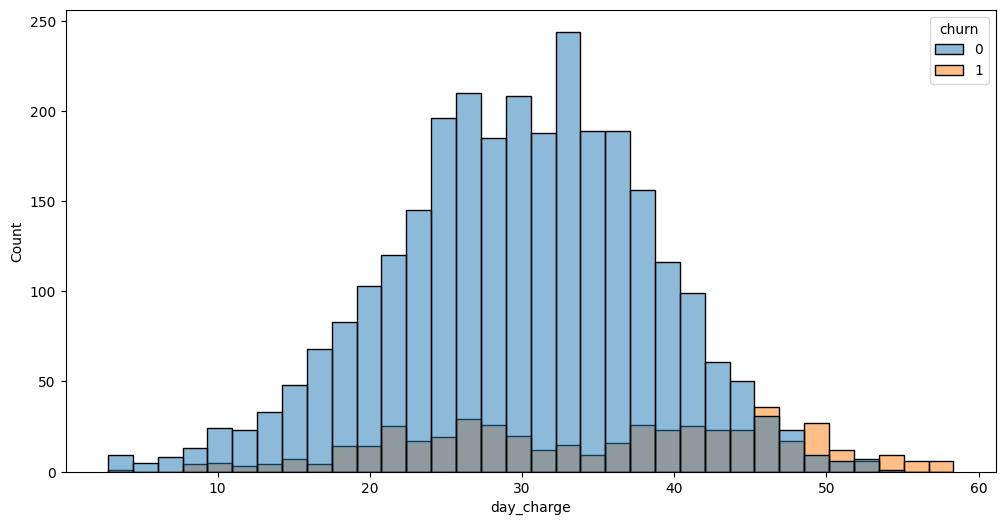

In [52]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['day_charge'], hue = Data['churn'])

# evening_calls

<AxesSubplot: xlabel='evening_calls', ylabel='Count'>

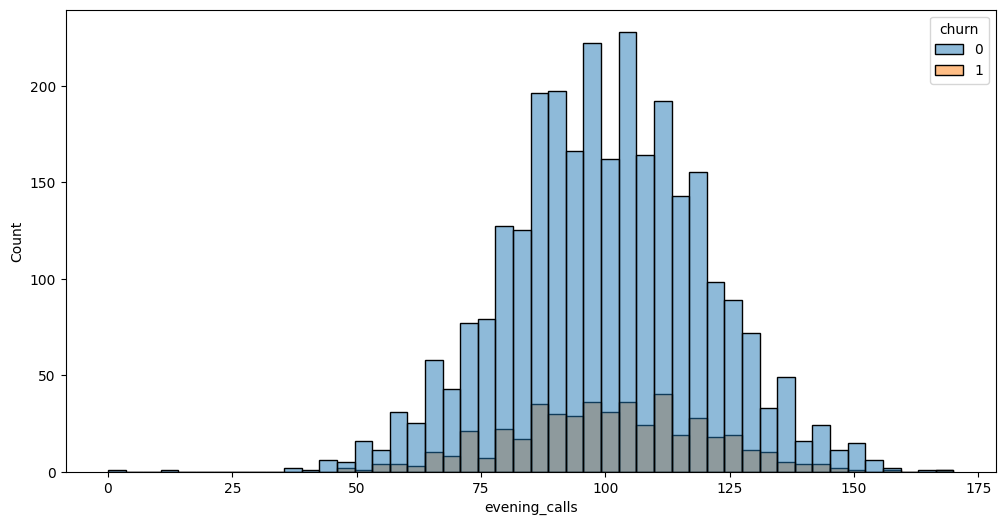

In [53]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['evening_calls'], hue = Data['churn'])

In evening_calls Higer churn of customer is in between 85 to 125

In [54]:
#Z Score
Data['zscore']=(Data.evening_calls-Data.evening_calls.mean())/Data.evening_calls.std()
#Outlier
Data[(Data['zscore']<-3)|(Data['zscore']>3)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
58,68.0,0.0,0,148.8,246.5,129.8,12.1,3.0,0.0,70.0,25.30,164,20.95,103,5.84,3,3.27,55.36,0,3.206690
301,127.0,0.0,0,266.6,264.8,207.2,5.9,1.0,0.0,106.0,45.32,168,22.51,119,9.32,2,1.59,78.74,1,3.407467
646,153.0,1.0,28,235.6,227.9,170.3,15.4,0.0,0.0,74.0,40.05,37,19.37,103,7.66,9,4.16,71.24,0,-3.167972
960,5.0,0.0,0,199.2,187.3,214.0,13.3,3.0,0.0,106.0,33.86,12,15.92,85,9.63,3,3.59,63.00,0,-4.422826
1615,74.0,0.0,0,157.1,213.1,280.4,7.6,2.0,0.0,95.0,26.71,36,18.11,77,12.62,3,2.05,59.49,0,-3.218166
2932,97.0,0.0,0,209.2,0.0,175.4,11.8,1.0,0.0,134.0,35.56,0,0.00,94,7.89,6,3.19,46.64,0,-5.025157
3219,150.0,1.0,35,139.6,332.8,213.8,8.8,2.0,0.0,72.0,23.73,170,28.29,105,9.62,2,2.38,64.02,0,3.507855


In [55]:
 zscore_capping(Data,'evening_calls', 3)

<AxesSubplot: xlabel='evening_calls', ylabel='Count'>

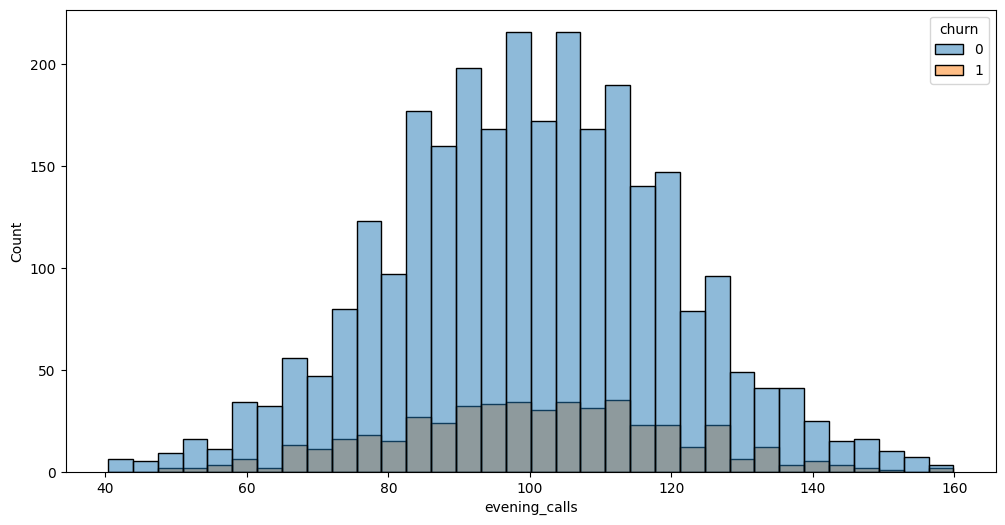

In [56]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['evening_calls'], hue = Data['churn'])

# evening_charge

<AxesSubplot: xlabel='evening_charge', ylabel='Count'>

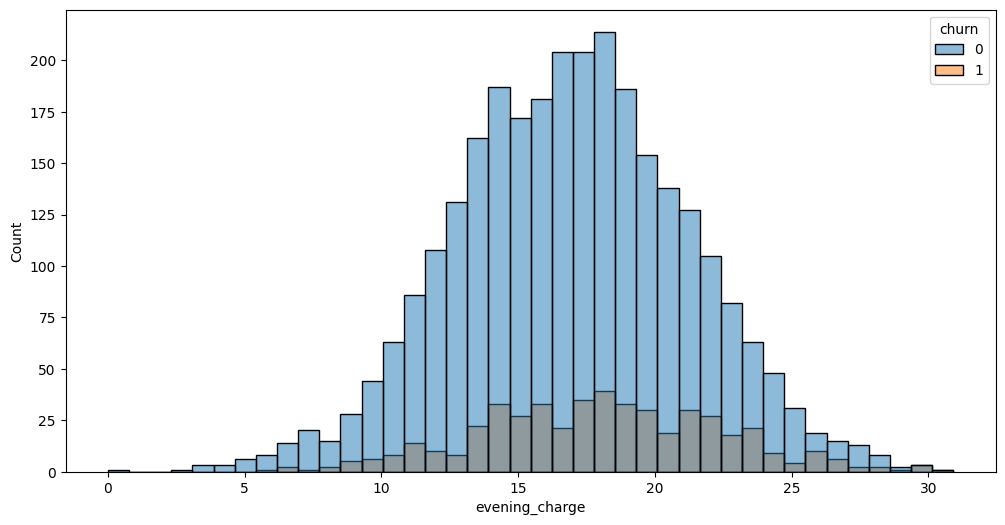

In [57]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['evening_charge'], hue = Data['churn'])

In evening_charge Higer churn of customer is in between 14 to 20

In [58]:
#Z Score
Data['zscore']=(Data.evening_charge-Data.evening_charge.mean())/Data.evening_charge.std()
#Outlier
Data[(Data['zscore']<-3)|(Data['zscore']>3)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
32,172.0,0.0,0,212.0,31.2,293.3,12.6,3.0,0.000000,121.0,36.04,115.000000,2.65,78,13.20,10,3.40,55.29,0,-3.348331
533,125.0,1.0,36,201.3,42.2,125.7,5.4,1.0,0.000000,117.0,34.22,78.000000,3.59,104,5.66,3,1.46,44.93,0,-3.130267
821,80.0,0.0,0,105.8,43.9,189.6,13.1,0.0,0.000000,110.0,17.99,88.000000,3.73,87,8.53,5,3.54,33.79,0,-3.097789
889,103.0,0.0,0,198.5,42.5,179.2,12.4,0.0,0.000000,112.0,33.75,90.000000,3.61,124,8.06,5,3.35,48.77,0,-3.125627
1233,48.0,0.0,0,128.2,48.1,116.3,8.9,0.0,0.000000,71.0,21.79,78.000000,4.09,80,5.23,3,2.40,33.51,0,-3.014276
2331,46.0,1.0,34,191.4,361.8,147.5,7.2,1.0,0.000000,102.0,32.54,96.000000,30.75,132,6.64,2,1.94,71.87,0,3.170381
2551,102.0,0.0,0,129.5,354.2,145.5,10.9,1.0,0.000000,56.0,22.02,118.000000,30.11,93,6.55,3,2.94,61.62,0,3.021912
2732,130.0,0.0,0,216.2,363.7,126.7,16.9,5.0,0.984547,106.0,36.75,86.000000,30.91,123,5.70,2,4.56,77.92,1,3.207498
2932,97.0,0.0,0,209.2,0.0,175.4,11.8,1.0,0.000000,134.0,35.56,40.346436,0.00,94,7.89,6,3.19,46.64,0,-3.963085


In [59]:
 zscore_capping(Data,'evening_charge', 3)

<AxesSubplot: xlabel='evening_charge', ylabel='Count'>

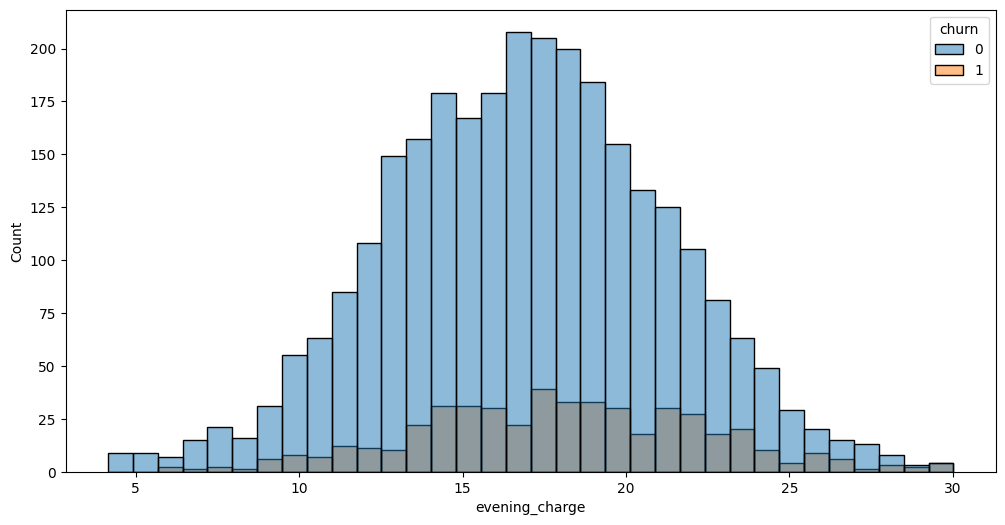

In [60]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['evening_charge'], hue = Data['churn'])

# night_calls

<AxesSubplot: xlabel='night_calls', ylabel='Count'>

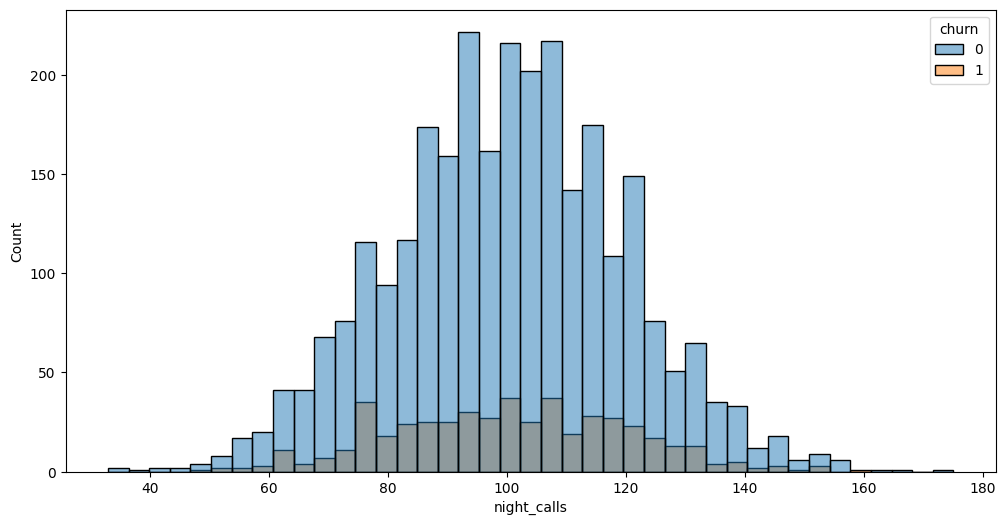

In [61]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['night_calls'], hue = Data['churn'])

In night_calls Higer churn of customer is in between 75 to 125

In [62]:
#Z Score
Data['zscore']=(Data.night_calls-Data.night_calls.mean())/Data.night_calls.std()
#Outlier
Data[(Data['zscore']<-3)|(Data['zscore']>3)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
493,129.0,1.0,33,119.6,278.7,263.4,5.9,2.0,0.0,104.0,20.33,88.0,23.69,175,11.85,2,1.59,57.46,0,3.827165
2288,34.0,0.0,0,193.7,126.9,221.2,8.8,0.0,0.0,74.0,32.93,84.0,10.79,166,9.95,4,2.38,56.05,0,3.367244
2659,15.0,0.0,0,121.1,216.0,235.1,16.1,2.0,0.0,130.0,20.59,86.0,18.36,33,10.58,5,4.35,53.88,0,-3.429355
2903,97.0,1.0,32,183.4,269.1,203.5,6.7,5.0,0.0,94.0,31.18,120.0,22.87,38,9.16,4,1.81,65.02,0,-3.173844
2988,105.0,0.0,0,259.3,175.2,222.4,12.0,3.0,0.0,96.0,44.08,97.0,14.89,36,10.01,5,3.24,72.22,0,-3.276048
3211,103.0,0.0,0,70.9,134.5,168.8,12.0,2.0,0.0,134.0,12.05,112.0,11.43,164,7.60,6,3.24,34.32,0,3.265040


In [63]:
 zscore_capping(Data,'night_calls', 3)

<AxesSubplot: xlabel='night_calls', ylabel='Count'>

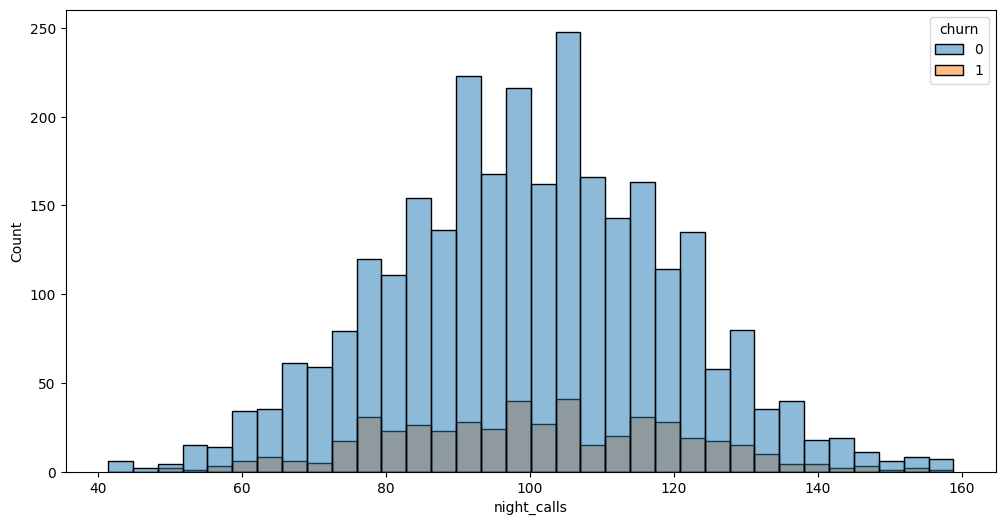

In [64]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['night_calls'], hue = Data['churn'])

# international_calls

<AxesSubplot: xlabel='international_calls', ylabel='Count'>

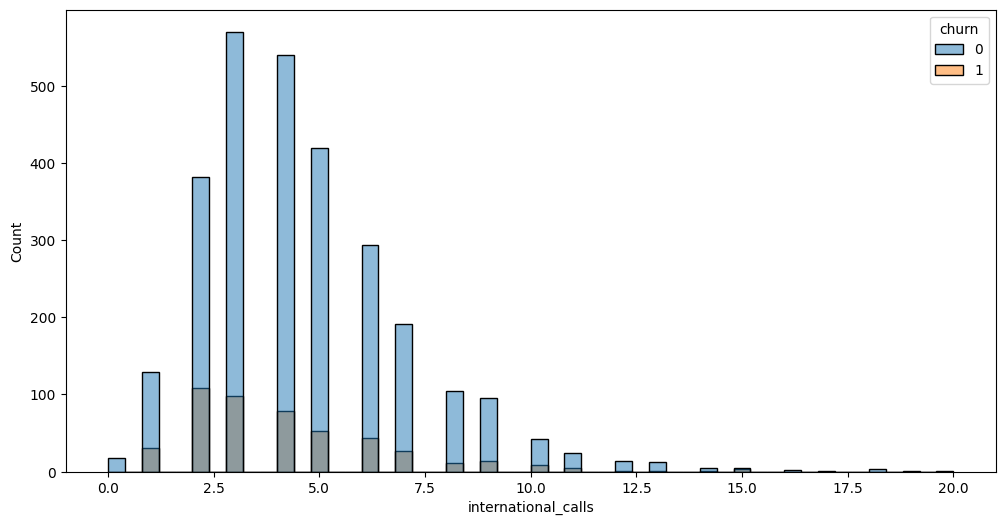

In [65]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['international_calls'], hue = Data['churn'])

In international_calls Higer churn of customer is in between 20 to 65

In [66]:
#Z Score
Data['zscore']=(Data.international_calls-Data.international_calls.mean())/Data.international_calls.std()
#Outlier
Data[(Data['zscore']<-3)|(Data['zscore']>3)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
22,130.0,0.0,0,183.0,72.9,181.800000,9.5,0.0,0.000000,112.0,31.11,99.0,6.20,78.0,8.18,19,2.57,48.06,0,5.899751
41,135.0,1.0,41,173.1,203.9,122.200000,14.6,0.0,0.984547,85.0,29.43,107.0,17.33,78.0,5.50,15,3.94,56.20,1,4.274537
182,67.0,1.0,36,115.6,237.7,169.900000,9.9,2.0,0.000000,111.0,19.65,94.0,20.20,103.0,7.65,12,2.67,50.17,0,3.055627
185,73.0,0.0,0,214.3,268.5,241.200000,10.8,1.0,0.000000,145.0,36.43,135.0,22.82,92.0,10.85,13,2.92,73.02,0,3.461930
219,106.0,0.0,0,223.0,110.1,188.700000,7.1,0.0,0.000000,121.0,37.91,98.0,9.36,107.0,8.49,12,1.92,57.68,0,3.055627
272,49.0,1.0,28,214.4,235.2,206.200000,8.0,3.0,0.000000,78.0,36.45,100.0,19.99,107.0,9.28,13,2.16,67.88,0,3.461930
329,158.0,0.0,0,205.2,240.6,79.700000,14.4,0.0,0.000000,97.0,34.88,77.0,20.45,108.0,3.59,12,3.89,62.81,0,3.055627
377,79.0,0.0,0,205.7,214.5,226.100000,6.7,1.0,0.000000,123.0,34.97,108.0,18.23,106.0,10.17,18,1.81,65.18,0,5.493448
474,139.0,1.0,20,214.6,235.1,162.800000,14.8,0.0,0.000000,101.0,36.48,132.0,19.98,132.0,7.33,12,4.00,67.79,0,3.055627
483,117.0,0.0,0,149.9,256.1,212.700000,13.3,2.0,0.000000,95.0,25.48,110.0,21.77,92.0,9.57,13,3.59,60.41,0,3.461930


In [67]:
 zscore_capping(Data,'international_calls', 3)

<AxesSubplot: xlabel='international_calls', ylabel='Count'>

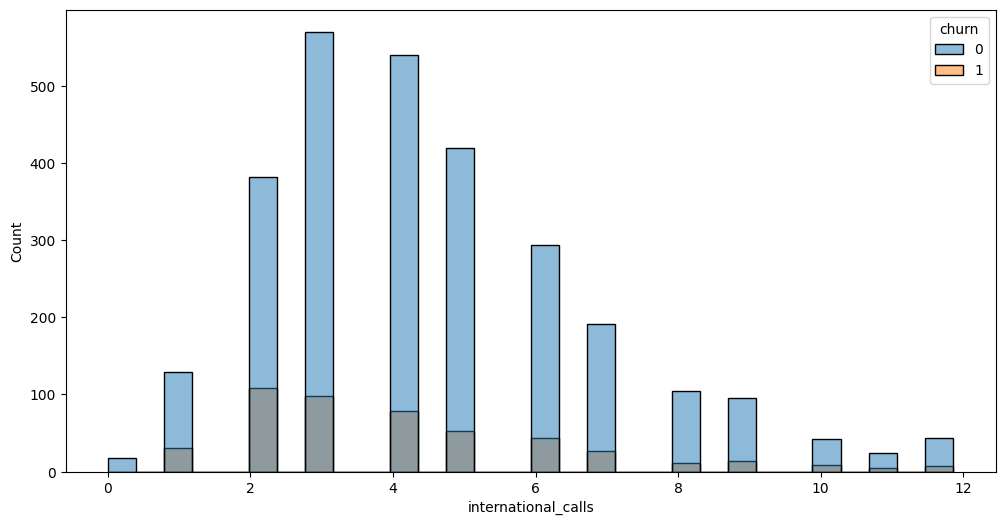

In [68]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['international_calls'], hue = Data['churn'])

# international_charge

<AxesSubplot: xlabel='international_charge', ylabel='Count'>

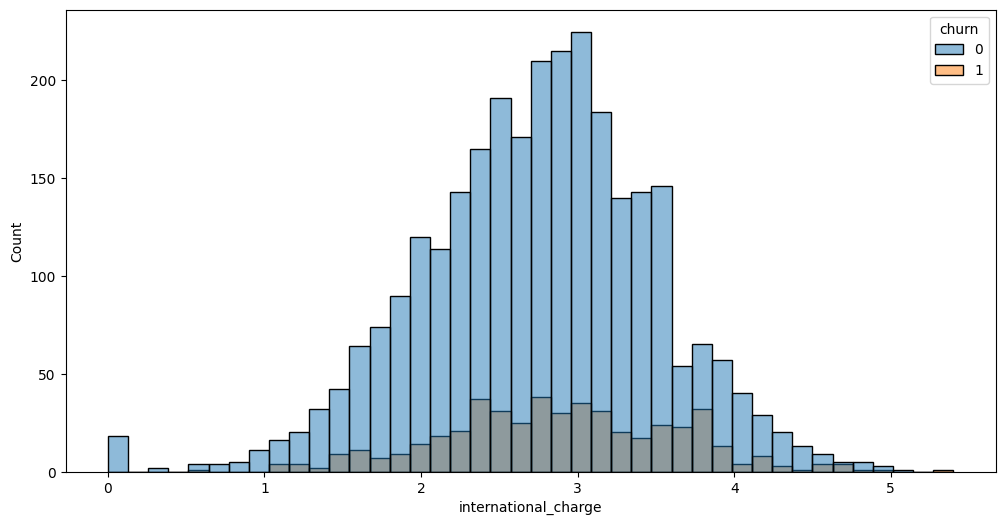

In [69]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['international_charge'], hue = Data['churn'])

In international_charge Higer churn of customer is in between 2 to 4

In [70]:
#Z Score
Data['zscore']=(Data.international_charge-Data.international_charge.mean())/Data.international_charge.std()
#Outlier
Data[(Data['zscore']<-3)|(Data['zscore']>3)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
115,36.0,1.0,42,196.8,254.9,138.3,20.0,0.0,0.984547,89.0,33.46,122.0,21.67,126.0,6.22,6.0,5.40,66.75,1,3.496304
179,70.0,0.0,0,232.1,292.3,201.2,0.0,3.0,0.000000,122.0,39.46,112.0,24.85,112.0,9.05,0.0,0.00,73.36,0,-3.667660
314,128.0,0.0,0,125.2,205.4,254.4,18.9,0.0,0.000000,99.0,21.28,107.0,17.46,111.0,11.45,2.0,5.10,55.29,0,3.098306
343,98.0,1.0,21,64.6,176.1,244.8,0.0,2.0,0.000000,98.0,10.98,86.0,14.97,84.0,11.02,0.0,0.00,36.97,0,-3.667660
488,165.0,0.0,0,242.9,209.8,228.4,0.0,1.0,0.000000,126.0,41.29,65.0,17.83,126.0,10.28,0.0,0.00,69.40,0,-3.667660
595,87.0,1.0,28,151.4,152.4,250.1,0.0,1.0,0.000000,95.0,25.74,97.0,12.95,109.0,11.25,0.0,0.00,49.94,0,-3.667660
712,106.0,0.0,0,114.4,78.3,232.7,0.0,2.0,0.000000,104.0,19.45,101.0,6.66,78.0,10.47,0.0,0.00,36.58,0,-3.667660
762,161.0,0.0,0,189.6,267.4,184.5,1.3,1.0,0.984547,78.0,32.23,117.0,22.73,137.0,8.30,6.0,0.35,63.61,0,-3.203329
878,62.0,0.0,0,281.0,160.6,77.9,0.0,1.0,0.000000,66.0,47.77,108.0,13.65,74.0,3.51,0.0,0.00,64.93,0,-3.667660
1028,70.0,0.0,0,222.8,215.9,223.5,0.0,1.0,0.000000,114.0,37.88,113.0,18.35,122.0,10.06,0.0,0.00,66.29,0,-3.667660


In [71]:
 zscore_capping(Data,'international_charge', 3)

<AxesSubplot: xlabel='international_charge', ylabel='Count'>

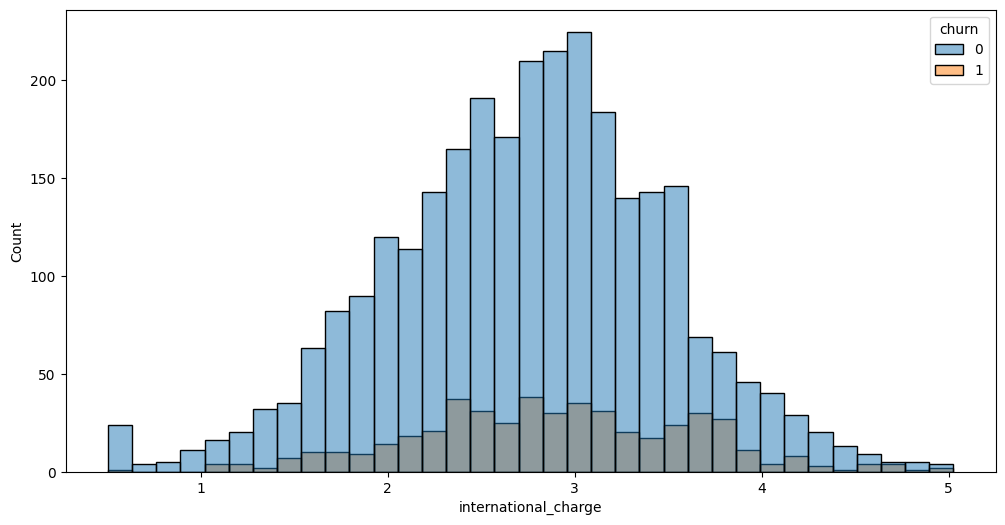

In [72]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['international_charge'], hue = Data['churn'])

In [73]:
Data.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn', 'zscore'],
      dtype='object')

# voice_mail_messages

<AxesSubplot: xlabel='voice_mail_messages', ylabel='Count'>

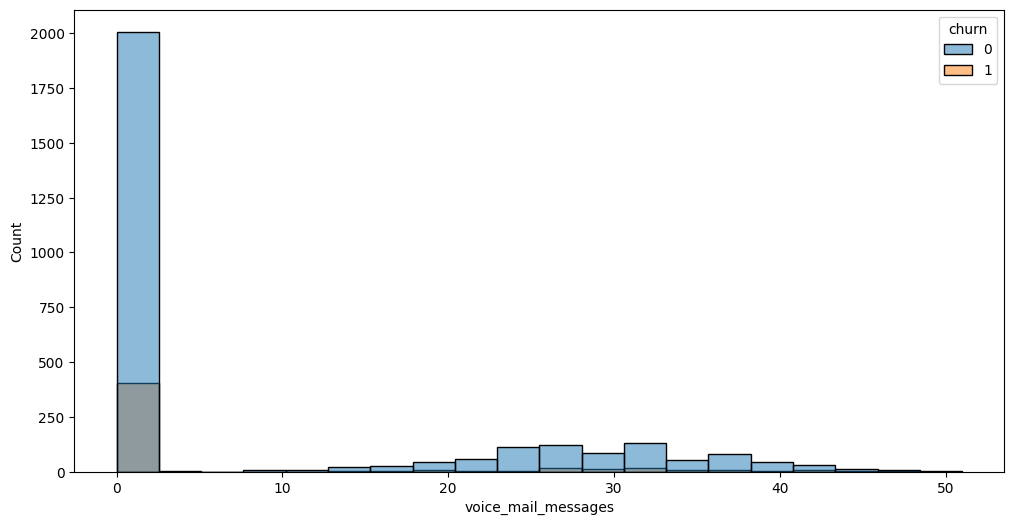

In [74]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['voice_mail_messages'], hue = Data['churn'])

In [75]:
#Z Score
Data['zscore']=(Data.international_charge-Data.voice_mail_messages.mean())/Data.voice_mail_messages.std()
#Outlier
Data[(Data['zscore']<-3)|(Data['zscore']>3)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore


In [76]:
 zscore_capping(Data,'voice_mail_messages', 3)

<AxesSubplot: xlabel='voice_mail_messages', ylabel='Count'>

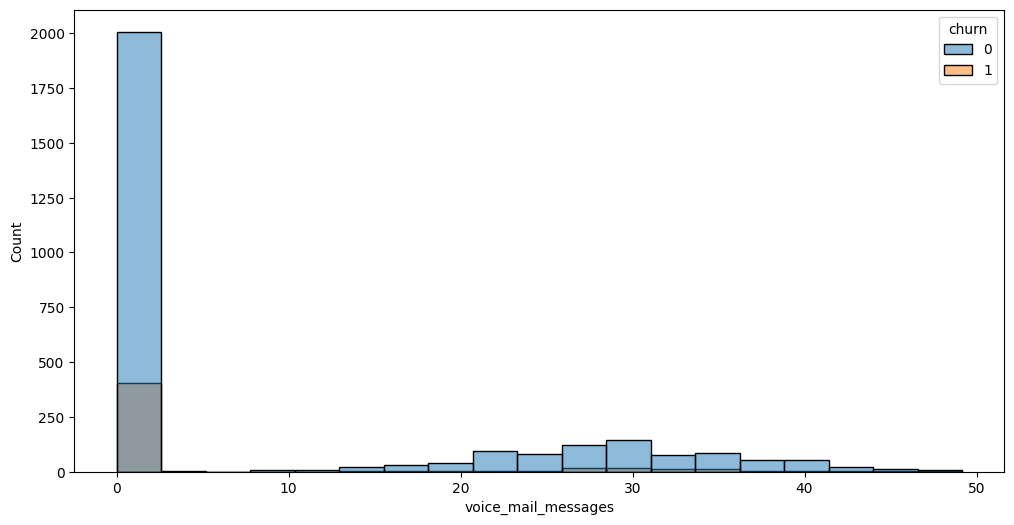

In [77]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['voice_mail_messages'], hue = Data['churn'])

# day_mins

<AxesSubplot: xlabel='day_mins', ylabel='Count'>

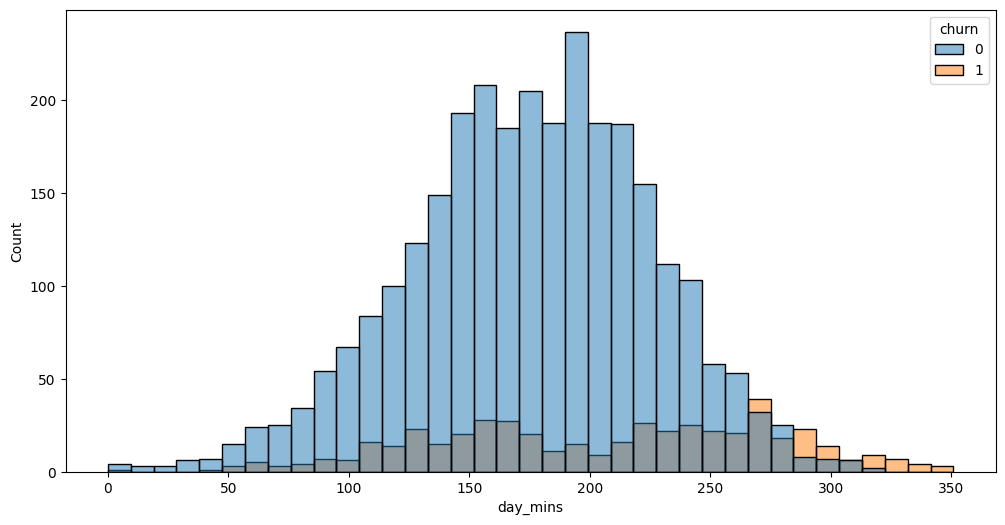

In [78]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['day_mins'], hue = Data['churn'])

In [79]:
#Z Score
Data['zscore']=(Data.day_mins-Data.day_mins.mean())/Data.day_mins.std()
#Outlier
Data[(Data['zscore']<-3)|(Data['zscore']>3)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
365,154.0,0.0,0.0,350.8,216.5,253.9,10.1,1.0,0.000000,75.000000,58.340611,94.0,18.40,100.0,11.43,9.0,2.73,92.20,1,3.139950
985,64.0,0.0,0.0,346.8,249.5,275.4,13.3,1.0,0.984547,55.000000,58.340611,79.0,21.21,102.0,12.39,9.0,3.59,96.15,1,3.066512
1052,98.0,0.0,0.0,12.5,256.6,169.4,7.7,1.0,0.984547,67.000000,2.784004,90.0,21.81,88.0,7.62,9.0,2.08,33.64,0,-3.071105
1345,98.0,0.0,0.0,0.0,159.6,167.1,6.8,4.0,0.000000,40.228391,2.784004,130.0,13.57,88.0,7.52,1.0,1.84,22.93,1,-3.300601
1397,101.0,0.0,0.0,0.0,192.1,168.8,7.2,1.0,0.000000,40.228391,2.784004,119.0,16.33,95.0,7.60,4.0,1.94,25.87,0,-3.300601
1986,70.0,0.0,0.0,7.9,136.4,156.6,12.1,0.0,0.000000,100.000000,2.784004,83.0,11.59,89.0,7.05,1.0,3.27,23.25,0,-3.155560
2594,115.0,0.0,0.0,345.3,203.4,217.5,11.8,1.0,0.984547,81.000000,58.340611,106.0,17.29,107.0,9.79,8.0,3.19,88.97,1,3.038973
2736,127.0,1.0,27.0,2.6,254.0,242.7,9.2,3.0,0.000000,113.000000,2.784004,102.0,21.59,156.0,10.92,5.0,2.48,35.43,0,-3.252866
2753,134.0,0.0,0.0,7.8,171.4,186.5,12.9,2.0,0.000000,86.000000,2.784004,100.0,14.57,80.0,8.39,2.0,3.48,27.77,0,-3.157396


In [80]:
 zscore_capping(Data,'day_mins', 3)

<AxesSubplot: xlabel='day_mins', ylabel='Count'>

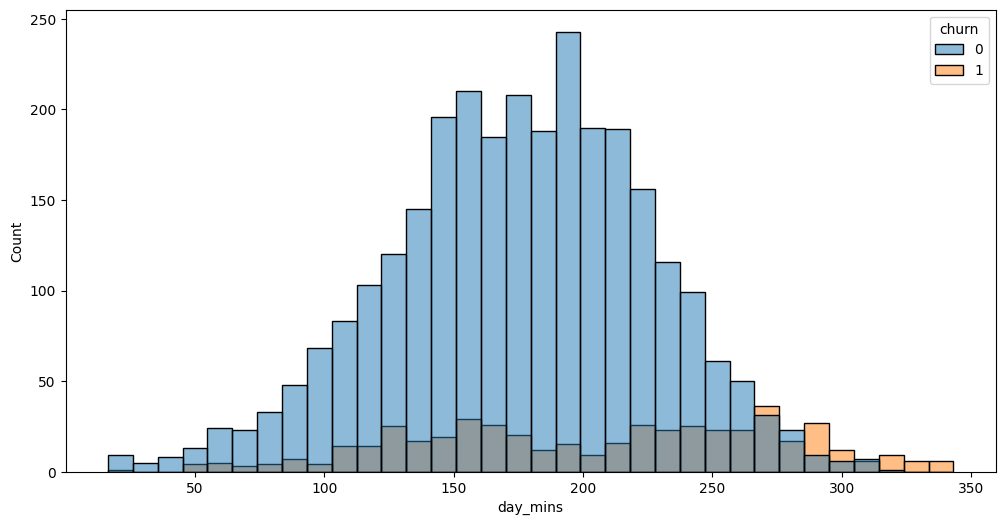

In [81]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['day_mins'], hue = Data['churn'])

# evening_mins

<AxesSubplot: xlabel='evening_mins', ylabel='Count'>

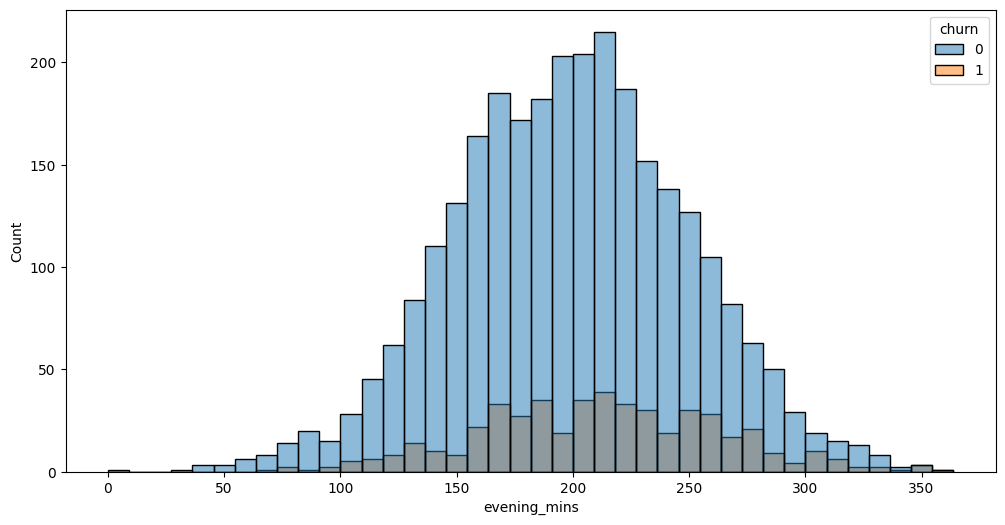

In [82]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['evening_mins'], hue = Data['churn'])

In [83]:
#Z Score
Data['zscore']=(Data.evening_mins-Data.evening_mins.mean())/Data.evening_mins.std()
#Outlier
Data[(Data['zscore']<-3)|(Data['zscore']>3)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
32,172.0,0.0,0.0,212.0,31.2,293.3,12.6,3.0,0.000000,121.0,36.04,115.000000,4.151537,78.0,13.20,10.0,3.40,55.29,0,-3.347811
533,125.0,1.0,36.0,201.3,42.2,125.7,5.4,1.0,0.000000,117.0,34.22,78.000000,4.151537,104.0,5.66,3.0,1.46,44.93,0,-3.130907
821,80.0,0.0,0.0,105.8,43.9,189.6,13.1,0.0,0.000000,110.0,17.99,88.000000,4.151537,87.0,8.53,5.0,3.54,33.79,0,-3.097386
889,103.0,0.0,0.0,198.5,42.5,179.2,12.4,0.0,0.000000,112.0,33.75,90.000000,4.151537,124.0,8.06,5.0,3.35,48.77,0,-3.124992
1233,48.0,0.0,0.0,128.2,48.1,116.3,8.9,0.0,0.000000,71.0,21.79,78.000000,4.151537,80.0,5.23,3.0,2.40,33.51,0,-3.014568
2331,46.0,1.0,34.0,191.4,361.8,147.5,7.2,1.0,0.000000,102.0,32.54,96.000000,30.015543,132.0,6.64,2.0,1.94,71.87,0,3.171119
2551,102.0,0.0,0.0,129.5,354.2,145.5,10.9,1.0,0.000000,56.0,22.02,118.000000,30.015543,93.0,6.55,3.0,2.94,61.62,0,3.021259
2732,130.0,0.0,0.0,216.2,363.7,126.7,16.9,5.0,0.984547,106.0,36.75,86.000000,30.015543,123.0,5.70,2.0,4.56,77.92,1,3.208584
2932,97.0,0.0,0.0,209.2,0.0,175.4,11.8,1.0,0.000000,134.0,35.56,40.346436,4.151537,94.0,7.89,6.0,3.19,46.64,0,-3.963027


In [84]:
 zscore_capping(Data,'evening_mins', 3)

<AxesSubplot: xlabel='evening_mins', ylabel='Count'>

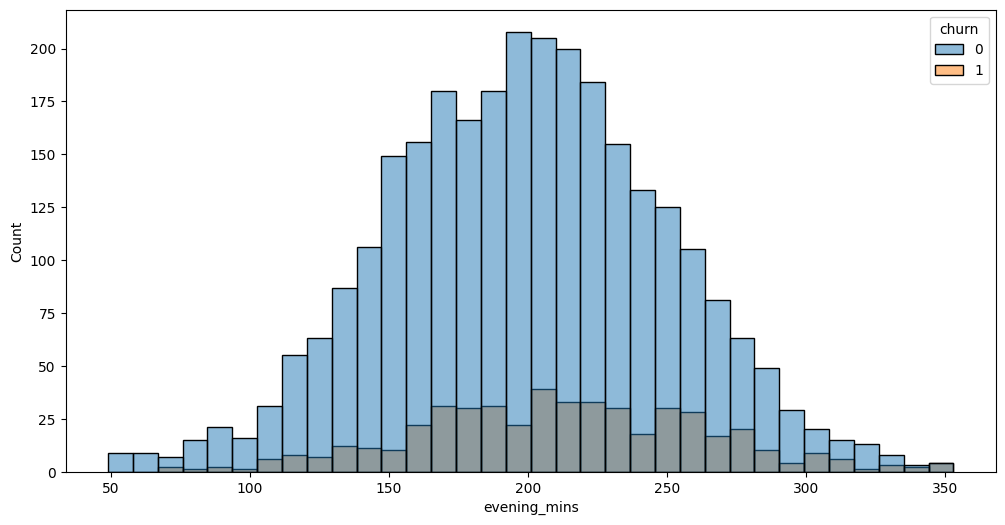

In [85]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['evening_mins'], hue = Data['churn'])

# international_mins

<AxesSubplot: xlabel='international_mins', ylabel='Count'>

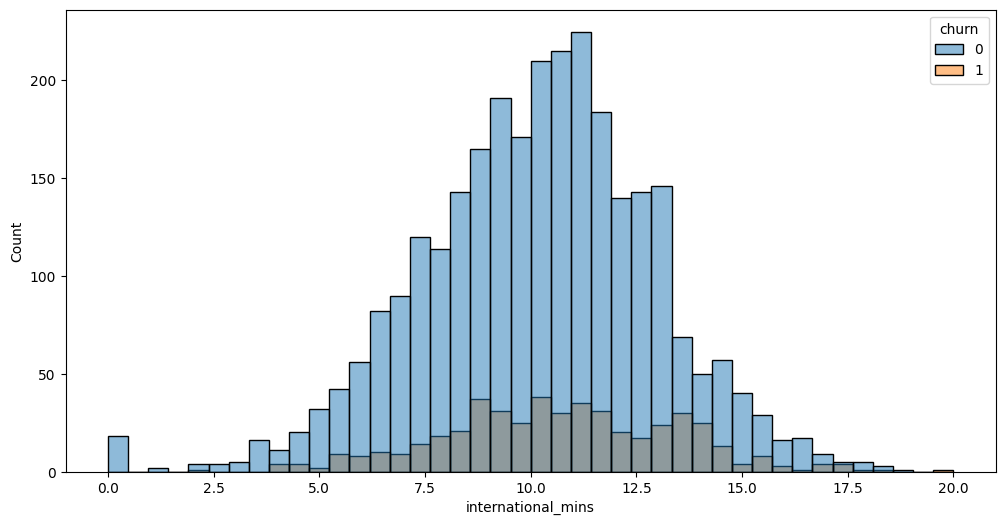

In [86]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['international_mins'], hue = Data['churn'])

In [87]:
#Z Score
Data['zscore']=(Data.international_mins-Data.international_mins.mean())/Data.international_mins.std()
#Outlier
Data[(Data['zscore']<-3)|(Data['zscore']>3)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
115,36.0,1.0,42.0,196.8,254.9,138.3,20.0,0.0,0.984547,89.0,33.46,122.0,21.67,126.0,6.22,6.0,5.025899,66.75,1,3.496872
179,70.0,0.0,0.0,232.1,292.3,201.2,0.0,3.0,0.000000,122.0,39.46,112.0,24.85,112.0,9.05,0.0,0.503264,73.36,0,-3.666863
314,128.0,0.0,0.0,125.2,205.4,254.4,18.9,0.0,0.000000,99.0,21.28,107.0,17.46,111.0,11.45,2.0,5.025899,55.29,0,3.102867
343,98.0,1.0,21.0,64.6,176.1,244.8,0.0,2.0,0.000000,98.0,10.98,86.0,14.97,84.0,11.02,0.0,0.503264,36.97,0,-3.666863
488,165.0,0.0,0.0,242.9,209.8,228.4,0.0,1.0,0.000000,126.0,41.29,65.0,17.83,126.0,10.28,0.0,0.503264,69.40,0,-3.666863
595,87.0,1.0,28.0,151.4,152.4,250.1,0.0,1.0,0.000000,95.0,25.74,97.0,12.95,109.0,11.25,0.0,0.503264,49.94,0,-3.666863
712,106.0,0.0,0.0,114.4,78.3,232.7,0.0,2.0,0.000000,104.0,19.45,101.0,6.66,78.0,10.47,0.0,0.503264,36.58,0,-3.666863
762,161.0,0.0,0.0,189.6,267.4,184.5,1.3,1.0,0.984547,78.0,32.23,117.0,22.73,137.0,8.30,6.0,0.503264,63.61,0,-3.201220
878,62.0,0.0,0.0,281.0,160.6,77.9,0.0,1.0,0.000000,66.0,47.77,108.0,13.65,74.0,3.51,0.0,0.503264,64.93,0,-3.666863
1028,70.0,0.0,0.0,222.8,215.9,223.5,0.0,1.0,0.000000,114.0,37.88,113.0,18.35,122.0,10.06,0.0,0.503264,66.29,0,-3.666863


In [88]:
 zscore_capping(Data,'international_mins', 3)

<AxesSubplot: xlabel='international_mins', ylabel='Count'>

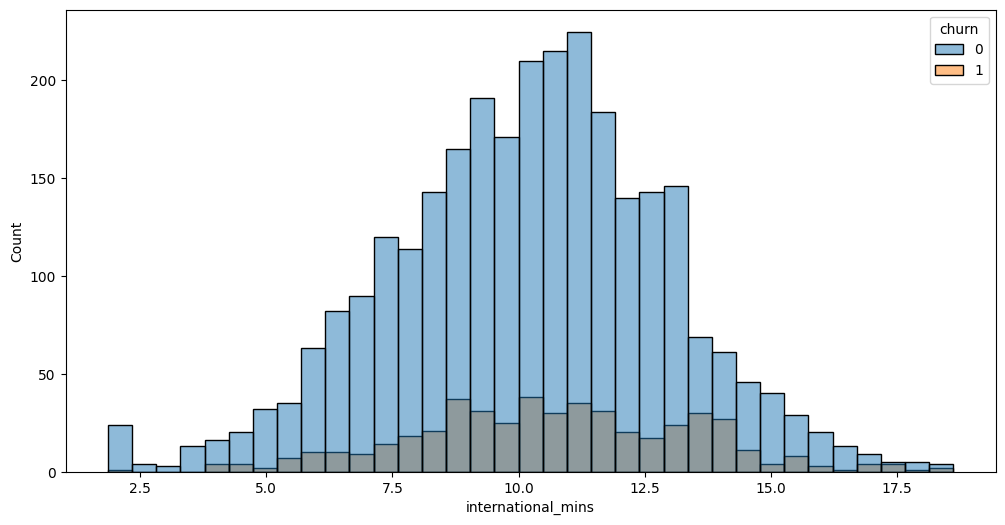

In [89]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['international_mins'], hue = Data['churn'])

# night_charge

<AxesSubplot: xlabel='night_charge', ylabel='Count'>

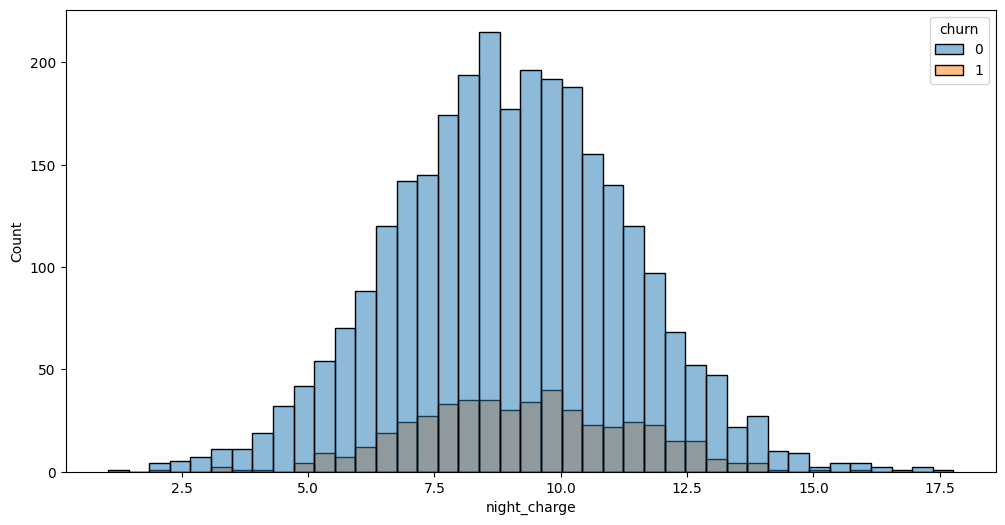

In [90]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['night_charge'], hue = Data['churn'])

In [91]:
#Z Score
Data['zscore']=(Data.night_charge-Data.night_charge.mean())/Data.night_charge.std()
#Outlier
Data[(Data['zscore']<-3)|(Data['zscore']>3)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
244,108.0,0.0,0.0,198.5,267.8,352.593578,9.4,0.0,0.0,99.0,33.75,60.0,22.76,75.0,15.97,3.000000,2.54,75.02,1,3.045282
883,42.0,0.0,0.0,146.3,255.9,49.150496,8.0,1.0,0.0,84.0,24.87,113.0,21.75,117.0,2.03,11.863091,2.16,50.81,0,-3.079840
922,80.0,0.0,0.0,239.9,142.3,352.593578,9.3,1.0,0.0,121.0,40.78,51.0,12.10,106.0,16.39,5.000000,2.51,71.78,0,3.229827
1113,152.0,0.0,0.0,206.3,292.8,49.150496,10.6,1.0,0.0,98.0,35.07,82.0,24.89,121.0,1.97,4.000000,2.86,64.79,0,-3.106204
1260,76.0,1.0,22.0,160.1,168.7,49.150496,9.5,3.0,0.0,107.0,27.22,136.0,14.34,102.0,1.04,4.000000,2.57,45.17,0,-3.514838
1317,89.0,1.0,29.0,163.5,274.8,352.593578,7.5,2.0,0.0,80.0,27.80,136.0,23.36,147.0,17.19,5.000000,2.03,70.38,0,3.581340
1445,55.0,1.0,8.0,222.5,171.5,352.593578,9.7,1.0,0.0,104.0,37.83,94.0,14.58,114.0,16.99,2.000000,2.62,72.02,0,3.493462
2321,153.0,0.0,0.0,154.6,263.0,352.593578,15.5,1.0,0.0,56.0,26.28,84.0,22.36,89.0,16.55,2.000000,4.19,69.38,0,3.300129
2663,172.0,0.0,0.0,169.8,183.1,352.593578,12.7,2.0,0.0,123.0,28.87,94.0,15.56,72.0,17.77,7.000000,3.43,65.63,0,3.836188
3107,73.0,0.0,0.0,157.6,198.3,352.593578,9.1,1.0,0.0,92.0,26.79,87.0,16.86,106.0,16.42,4.000000,2.46,62.53,0,3.243009


In [92]:
 zscore_capping(Data,'night_charge', 3)

<AxesSubplot: xlabel='night_charge', ylabel='Count'>

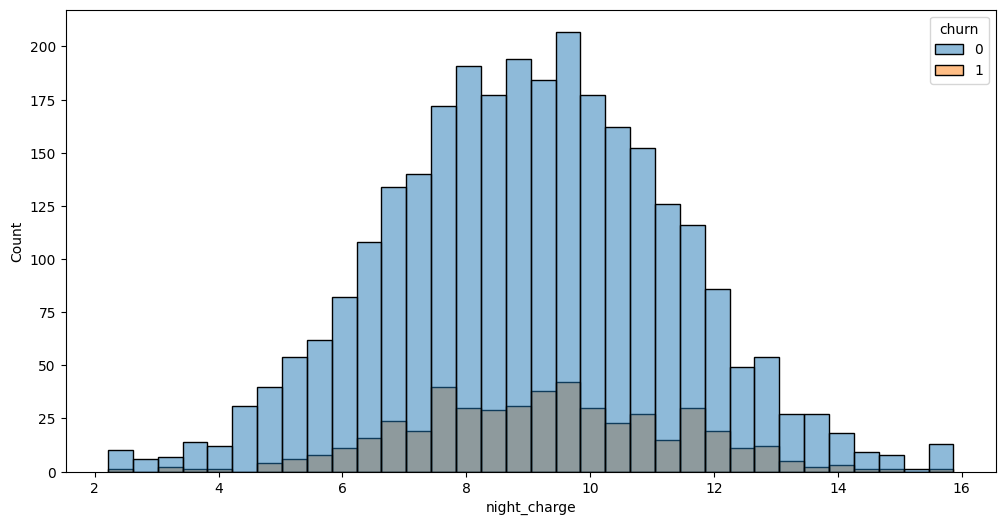

In [93]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['night_charge'], hue = Data['churn'])

# total_charge

<AxesSubplot: xlabel='total_charge', ylabel='Count'>

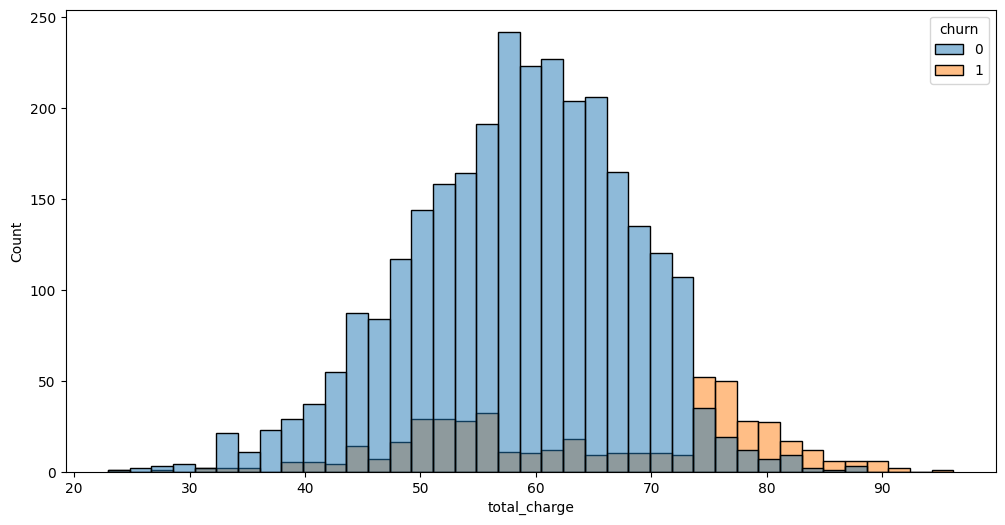

In [94]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['total_charge'], hue = Data['churn'])

In [95]:
#Z Score
Data['zscore']=(Data.total_charge-Data.total_charge.mean())/Data.total_charge.std()
#Outlier
Data[(Data['zscore']<-3)|(Data['zscore']>3)]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
15,161.0,0.0,0.0,332.900000,317.8,160.6,5.4,4.0,0.000000,67.000000,56.590000,97.0,27.01,128.0,7.23,9.0,1.46,92.29,1,3.126969
77,144.0,0.0,0.0,61.600000,77.1,173.0,8.2,4.0,0.000000,117.000000,10.470000,85.0,6.55,99.0,7.79,7.0,2.21,27.02,1,-3.087883
365,154.0,0.0,0.0,343.177265,216.5,253.9,10.1,1.0,0.000000,75.000000,58.340611,94.0,18.40,100.0,11.43,9.0,2.73,92.20,1,3.118400
648,131.0,1.0,39.0,69.100000,101.3,104.8,9.1,0.0,0.000000,122.000000,11.750000,136.0,8.61,94.0,4.72,4.0,2.46,27.54,0,-3.038370
985,64.0,0.0,0.0,343.177265,249.5,275.4,13.3,1.0,0.984547,55.000000,58.340611,79.0,21.21,102.0,12.39,9.0,3.59,96.15,1,3.494509
1345,98.0,0.0,0.0,16.372930,159.6,167.1,6.8,4.0,0.000000,40.228391,2.784004,130.0,13.57,88.0,7.52,1.0,1.84,22.93,1,-3.477323
1397,101.0,0.0,0.0,16.372930,192.1,168.8,7.2,1.0,0.000000,40.228391,2.784004,119.0,16.33,95.0,7.60,4.0,1.94,25.87,0,-3.197383
1621,138.0,1.0,21.0,19.500000,140.9,179.7,7.9,0.0,0.000000,149.000000,3.320000,109.0,11.98,111.0,8.09,1.0,2.13,25.52,0,-3.230710
1986,70.0,0.0,0.0,16.372930,136.4,156.6,12.1,0.0,0.000000,100.000000,2.784004,83.0,11.59,89.0,7.05,1.0,3.27,23.25,0,-3.446853
2753,134.0,0.0,0.0,16.372930,171.4,186.5,12.9,2.0,0.000000,86.000000,2.784004,100.0,14.57,80.0,8.39,2.0,3.48,27.77,0,-3.016470


In [96]:
 zscore_capping(Data,'total_charge', 3)

<AxesSubplot: xlabel='total_charge', ylabel='Count'>

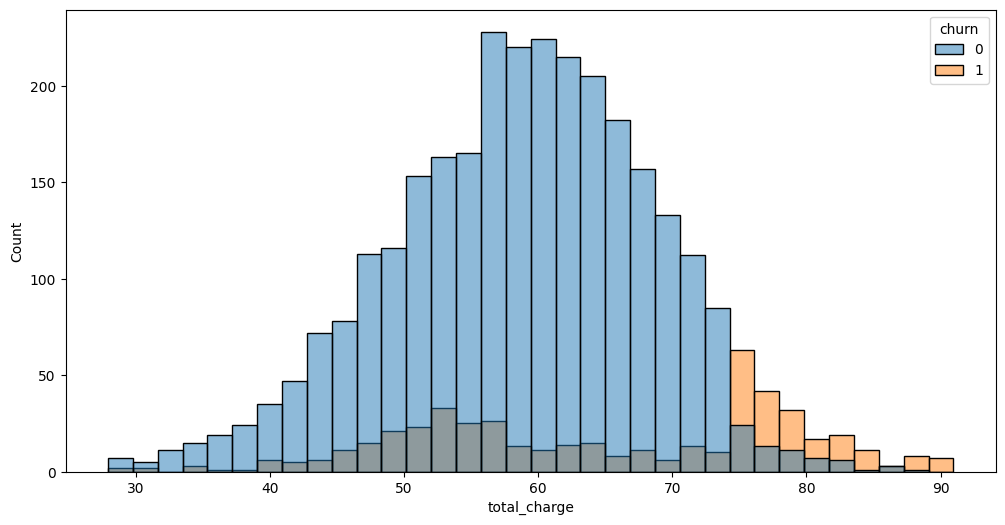

In [97]:
plt.rcParams['figure.figsize']=(12,6)
sns.histplot(x=Data['total_charge'], hue = Data['churn'])

In [98]:
Data.corr()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
account_length,1.000000,0.003149,-0.004491,0.006563,-0.006505,-0.009438,0.010582,-0.003942,0.024800,0.038891,0.006561,0.018438,-0.006492,-0.013548,-0.009441,0.021586,0.010615,0.001800,0.016547,0.001781
voice_mail_plan,0.003149,1.000000,0.957027,-0.001701,0.021325,0.006094,-0.002093,-0.020161,0.006006,-0.011915,-0.001702,-0.007215,0.021338,0.015257,0.006078,0.005676,-0.002052,0.008629,-0.102148,0.008585
voice_mail_messages,-0.004491,0.957027,1.000000,0.000664,0.017391,0.007878,0.001687,-0.015722,0.008773,-0.010357,0.000661,-0.006698,0.017406,0.006791,0.007859,0.012219,0.001713,0.009722,-0.089717,0.009710
day_mins,0.006563,-0.001701,0.000664,1.000000,0.007116,0.004052,-0.011269,-0.012561,0.049332,0.002509,1.000000,0.016547,0.007103,0.023493,0.004029,0.008918,-0.011207,0.884543,0.205360,0.884614
evening_mins,-0.006505,0.021325,0.017391,0.007116,1.000000,-0.012686,-0.011662,-0.014326,0.018801,-0.021491,0.007123,-0.015459,1.000000,0.007235,-0.012700,0.004927,-0.011692,0.413386,0.092650,0.413250
night_mins,-0.009438,0.006094,0.007878,0.004052,-0.012686,1.000000,-0.014640,-0.010893,-0.028807,0.022168,0.004052,-0.001794,-0.012694,0.011012,0.999999,-0.009620,-0.014611,0.213958,0.035851,0.214037
international_mins,0.010582,-0.002093,0.001687,-0.011269,-0.011662,-0.014640,1.000000,-0.009420,0.044994,0.021761,-0.011271,0.008775,-0.011669,-0.013016,-0.014646,0.027597,0.999993,0.053795,0.067230,0.053994
customer_service_calls,-0.003942,-0.020161,-0.015722,-0.012561,-0.014326,-0.010893,-0.009420,1.000000,-0.025285,-0.019103,-0.012565,0.001313,-0.014328,-0.014634,-0.010877,-0.013733,-0.009452,-0.020113,0.202947,-0.020085
international_plan,0.024800,0.006006,0.008773,0.049332,0.018801,-0.028807,0.044994,-0.025285,1.000000,0.003315,0.049333,0.005879,0.018808,0.012537,-0.028815,0.015145,0.044903,0.047937,0.259852,0.048415
day_calls,0.038891,-0.011915,-0.010357,0.002509,-0.021491,0.022168,0.021761,-0.019103,0.003315,1.000000,0.002512,0.009556,-0.021487,-0.020081,0.022161,0.002295,0.021865,-0.000159,0.019524,-0.000221


<AxesSubplot: >

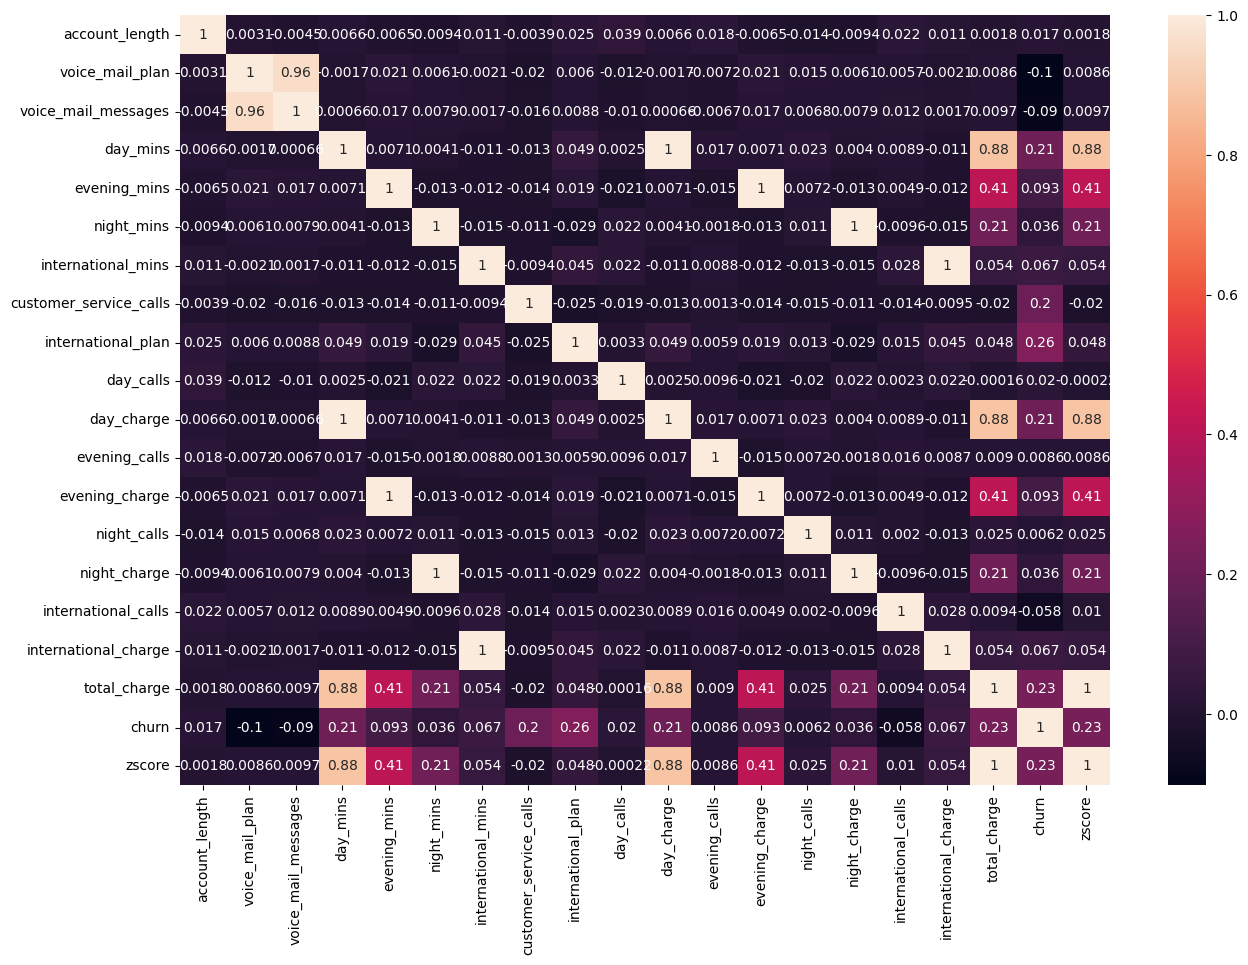

In [99]:
#Heatmap
plt.rcParams['figure.figsize']=(15,10)
sns.heatmap(Data.corr(),annot=True)

# observation:
1)In a data voice_mail_plan and voice_mail_messages contain strong correlation ie 1

2)In a data night_charge and night_mins contain strong correlation ie 1

3)In a data international_mins and international_charge contain strong correlation ie 1

4)In a data day_charge and day_mins contain strong correlation ie 0.88

5)In a data evening_charge and evening_mins contain strong correlation ie 1


In [100]:
Data.corr()["churn"].sort_values()

voice_mail_plan          -0.102148
voice_mail_messages      -0.089717
international_calls      -0.057857
night_calls               0.006227
evening_calls             0.008598
account_length            0.016547
day_calls                 0.019524
night_mins                0.035851
night_charge              0.035855
international_mins        0.067230
international_charge      0.067249
evening_charge            0.092641
evening_mins              0.092650
customer_service_calls    0.202947
day_charge                0.205359
day_mins                  0.205360
zscore                    0.231549
total_charge              0.231809
international_plan        0.259852
churn                     1.000000
Name: churn, dtype: float64

In [101]:
#Not important columns

1)voice_mail_plan -0.102148 
       2)voice_mail_messages -0.089728

3)international_calls -0.052844 
        4)night_calls 0.006141

5)evening_calls 0.009233

In [102]:
mean=Data.mean()
std= Data.std()
upper_bound=mean + 3*std
lower_bound=mean - 3*std

In [103]:
#Counting of outlier
Data[(Data<lower_bound)|(Data>upper_bound)].count()

account_length              7
voice_mail_plan             0
voice_mail_messages         3
day_mins                    9
evening_mins                9
night_mins                 13
international_mins         22
customer_service_calls     35
international_plan        323
day_calls                   9
day_charge                  9
evening_calls               7
evening_charge              9
night_calls                 6
night_charge               13
international_calls        50
international_charge       22
total_charge               11
churn                       0
zscore                     11
dtype: int64

# Feature Engineering

In [104]:
#Decision Tree : To find Best Feature

In [105]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
X=Data.drop("churn",axis=1)
y = Data["churn"]

In [107]:
Data

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,zscore
0,128.0,1.0,25.0,265.1,197.4,244.7,10.0,1.0,0.000000,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,75.56,0,1.533979
1,107.0,1.0,26.0,161.6,195.5,254.4,13.7,1.0,0.000000,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,59.24,0,-0.019972
2,137.0,0.0,0.0,243.4,121.2,162.6,12.2,0.0,0.000000,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,62.29,0,0.270441
3,84.0,0.0,0.0,299.4,61.9,196.9,6.6,2.0,0.984547,71.0,50.90,88.0,5.26,89.0,8.86,7.0,1.78,66.80,0,0.699873
4,75.0,0.0,0.0,166.7,148.3,186.9,10.1,3.0,0.984547,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,52.09,0,-0.700778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192.0,1.0,36.0,156.2,215.5,279.1,9.9,2.0,0.000000,77.0,26.55,126.0,18.32,83.0,12.56,6.0,2.67,60.10,0,0.061915
3329,68.0,0.0,0.0,231.1,153.4,191.3,9.6,3.0,0.000000,57.0,39.29,55.0,13.04,123.0,8.61,4.0,2.59,63.53,0,0.388511
3330,28.0,0.0,0.0,180.8,288.8,191.9,14.1,2.0,0.000000,109.0,30.74,58.0,24.55,91.0,8.64,6.0,3.81,67.74,0,0.789377
3331,184.0,0.0,0.0,213.8,159.6,139.2,5.0,2.0,0.984547,105.0,36.35,84.0,13.57,137.0,6.26,10.0,1.35,57.53,0,-0.182794


In [108]:
model = DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

In [109]:
model.feature_importances_

array([0.01585043, 0.10977747, 0.00558063, 0.00850406, 0.00969977,
       0.01652782, 0.01036171, 0.1125205 , 0.06863972, 0.01508563,
       0.00544786, 0.01810328, 0.01254221, 0.00960886, 0.00529253,
       0.07637038, 0.08170307, 0.27442626, 0.1439578 ])

In [110]:
model.feature_names_in_

array(['account_length', 'voice_mail_plan', 'voice_mail_messages',
       'day_mins', 'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'zscore'], dtype=object)

In [111]:
data = pd.DataFrame({"Column":model.feature_names_in_,"Value":model.feature_importances_})

In [112]:
data.sort_values("Value")

,Column,Value
14,night_charge,0.005293
10,day_charge,0.005448
2,voice_mail_messages,0.005581
3,day_mins,0.008504
13,night_calls,0.009609
4,evening_mins,0.009700
6,international_mins,0.010362
12,evening_charge,0.012542
9,day_calls,0.015086
0,account_length,0.015850


In [113]:
from sklearn.feature_selection import RFE

rfe = RFE(model, n_features_to_select=12) #Decision tree
fit = rfe.fit(X, y)

print(fit.n_features_,fit.support_,fit.ranking_)

12 [False  True False False  True  True  True  True  True  True  True  True
 False False False  True False  True  True] [5 1 8 3 1 1 1 1 1 1 1 1 7 2 4 1 6 1 1]


In [114]:
fit.get_feature_names_out()

array(['voice_mail_plan', 'evening_mins', 'night_mins',
       'international_mins', 'customer_service_calls',
       'international_plan', 'day_calls', 'day_charge', 'evening_calls',
       'international_calls', 'total_charge', 'zscore'], dtype=object)

In [115]:
X

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,zscore
0,128.0,1.0,25.0,265.1,197.4,244.7,10.0,1.0,0.000000,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,75.56,1.533979
1,107.0,1.0,26.0,161.6,195.5,254.4,13.7,1.0,0.000000,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,59.24,-0.019972
2,137.0,0.0,0.0,243.4,121.2,162.6,12.2,0.0,0.000000,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,62.29,0.270441
3,84.0,0.0,0.0,299.4,61.9,196.9,6.6,2.0,0.984547,71.0,50.90,88.0,5.26,89.0,8.86,7.0,1.78,66.80,0.699873
4,75.0,0.0,0.0,166.7,148.3,186.9,10.1,3.0,0.984547,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,52.09,-0.700778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192.0,1.0,36.0,156.2,215.5,279.1,9.9,2.0,0.000000,77.0,26.55,126.0,18.32,83.0,12.56,6.0,2.67,60.10,0.061915
3329,68.0,0.0,0.0,231.1,153.4,191.3,9.6,3.0,0.000000,57.0,39.29,55.0,13.04,123.0,8.61,4.0,2.59,63.53,0.388511
3330,28.0,0.0,0.0,180.8,288.8,191.9,14.1,2.0,0.000000,109.0,30.74,58.0,24.55,91.0,8.64,6.0,3.81,67.74,0.789377
3331,184.0,0.0,0.0,213.8,159.6,139.2,5.0,2.0,0.984547,105.0,36.35,84.0,13.57,137.0,6.26,10.0,1.35,57.53,-0.182794


In [116]:
data = pd.DataFrame({"Column":X.columns,"Ranking":fit.ranking_})

In [117]:
data[data["Ranking"]>1]

,Column,Ranking
0,account_length,5
2,voice_mail_messages,8
3,day_mins,3
12,evening_charge,7
13,night_calls,2
14,night_charge,4
16,international_charge,6


In [118]:
#According to Decision Tree features importance

1)voice_mail_plan 0.000000 2)day_mins 0.003755 

3)day_charge 0.006795 4)night_calls 0.007832 

5)night_mins 0.009540

In [119]:
Data = Data.drop(["voice_mail_plan","day_mins","day_charge","night_mins","night_calls"],axis=1)
Data

,account_length,voice_mail_messages,evening_mins,international_mins,customer_service_calls,international_plan,day_calls,evening_calls,evening_charge,night_charge,international_calls,international_charge,total_charge,churn,zscore
0,128.0,25.0,197.4,10.0,1.0,0.000000,110.0,99.0,16.78,11.01,3.0,2.70,75.56,0,1.533979
1,107.0,26.0,195.5,13.7,1.0,0.000000,123.0,103.0,16.62,11.45,3.0,3.70,59.24,0,-0.019972
2,137.0,0.0,121.2,12.2,0.0,0.000000,114.0,110.0,10.30,7.32,5.0,3.29,62.29,0,0.270441
3,84.0,0.0,61.9,6.6,2.0,0.984547,71.0,88.0,5.26,8.86,7.0,1.78,66.80,0,0.699873
4,75.0,0.0,148.3,10.1,3.0,0.984547,113.0,122.0,12.61,8.41,3.0,2.73,52.09,0,-0.700778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192.0,36.0,215.5,9.9,2.0,0.000000,77.0,126.0,18.32,12.56,6.0,2.67,60.10,0,0.061915
3329,68.0,0.0,153.4,9.6,3.0,0.000000,57.0,55.0,13.04,8.61,4.0,2.59,63.53,0,0.388511
3330,28.0,0.0,288.8,14.1,2.0,0.000000,109.0,58.0,24.55,8.64,6.0,3.81,67.74,0,0.789377
3331,184.0,0.0,159.6,5.0,2.0,0.984547,105.0,84.0,13.57,6.26,10.0,1.35,57.53,0,-0.182794


In [120]:
Data['churn'].value_counts()*100/len(Data['churn'])

0    85.508551
1    14.491449
Name: churn, dtype: float64

# Conclusion

Account lenth not play important role in charn.
In the International plan those customers who have this plan are churn more 

In international calls data shows that the churn rate of which customers is high,
those who take the international plan so it means that in international call charges are high
 also there is a call drop.
    
#RECCOMENDATIONS:
1)Improve network quality
2)discount plan to the customer
3)Improve the voice mail quality 
4)take feedback from customer
    

# Splitting the dataset into the Training set and Test set

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X=Data.drop("churn",axis=1)
y = Data["churn"]

In [123]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

In [124]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

# Model Building

In [125]:
# Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [127]:
# Logistic regression model
classifier=LogisticRegression()
classifier.fit(X,y)

C:\Users\Admin\anaconda3\envs\pooja\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [128]:
# Predict for x dataset
y_pred=classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [129]:
y_pred_df=pd.DataFrame({'actual_y':y,'y_pred_prob':y_pred})
y_pred_df

,actual_y,y_pred_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3328,0,0
3329,0,0
3330,0,0
3331,0,0


In [130]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(y,y_pred)
confusion_matrix

array([[2811,   39],
       [ 446,   37]], dtype=int64)

In [131]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 

array = Data.values
X =  array[:,0:13]
Y = array[:,13]
seed = 7

kfold = KFold(n_splits=10, random_state=seed, shuffle=True) # evaluation method
cart = DecisionTreeClassifier()
num_trees = 100

model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed) #Classifier
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

C:\Users\Admin\anaconda3\envs\pooja\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\pooja\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\pooja\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\pooja\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\pooja\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.

0.9762933592274908


In [138]:
#Random Forest

In [132]:
# Random Forest Classification
from pandas import read_csv
from numpy import array
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

array=Data.values
X = array[:,0:13]
Y = array[:,13]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=12, random_state=7, shuffle=True) #Bootstrap

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
for i in range(len(results)):
    print("model:"+str(i)+"Accuracy is : "+str(results[i]))

model:0Accuracy is : 0.9748201438848921
model:1Accuracy is : 0.9856115107913669
model:2Accuracy is : 0.9784172661870504
model:3Accuracy is : 0.9820143884892086
model:4Accuracy is : 0.9856115107913669
model:5Accuracy is : 0.9820143884892086
model:6Accuracy is : 0.9928057553956835
model:7Accuracy is : 0.9856115107913669
model:8Accuracy is : 0.9748201438848921
model:9Accuracy is : 0.9494584837545126
model:10Accuracy is : 0.9675090252707581
model:11Accuracy is : 0.9855595667870036


In [133]:
print(results.mean())

0.9786878078764425


In [134]:
# AdaBoost Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

array = Data.values

X = array[:,0:13]
Y = array[:,13]

num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True) 
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.9205022387657118


In [135]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


array = Data.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7,shuffle=True)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

C:\Users\Admin\anaconda3\envs\pooja\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\anaconda3\envs\pooja\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

0.8823937710165255


In [136]:
estimators

[('logistic', LogisticRegression(max_iter=500)),
 ('cart', DecisionTreeClassifier()),
 ('svm', SVC())]

In [137]:
# Fit Model no Training data
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

# Splits data into train and test sets
seed= 7
test_size = 0.33
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=test_size,random_state=seed)

model = XGBClassifier(n_estimators=90,max_depth=3)
model.fit(X_train,Y_train)

# Make Predictions for test data
Y_pred = model.predict(X_test)
predictions=[round(value) for value in Y_pred]

# Evaluate Predictions
accuracy=accuracy_score(Y_test,predictions)
print("Accuracy: %.2f%%!"%(accuracy*100.0))

estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))


Accuracy: 97.64%!
